### Business Case: Aerofit - Descriptive Statistics & Probability

# 🏋️‍♂️ Aerofit Treadmill Buyer Analysis

## 1. 📘 Introduction  
**What is Aerofit?**

Aerofit is a prominent brand in the Indian fitness equipment industry, originating from *M/s. Sachdev Sports Co.*, which was established in 1928 by **Ram Ratan Sachdev** in Hyderabad. Initially a leading supplier of sports goods across Andhra Pradesh and Telangana, the company expanded into fitness through *M/s. Sachdev Overseas*, importing high-quality yet affordable equipment under the **Aerofit** brand.

To further drive innovation, **Nityasach Fitness Pvt. Ltd.** was launched by **Nityesh Sachdev**, with Aerofit as its flagship brand. The company’s mission is to bridge the gap between international fitness technology and the Indian market by offering advanced equipment at accessible price points, while maintaining a strong focus on post-sales support and customer satisfaction.

Aerofit's product line includes:
- Treadmills  
- Exercise bikes  
- Gym equipment  
- Fitness accessories  

These products are designed to cater to a wide range of customers — from beginners to serious athletes.

---

## 2. 🎯 Objective  

The goal of this analysis is to:
- **Create comprehensive customer profiles** for each Aerofit treadmill product using **descriptive analytics**.
- Build **two-way contingency tables**.
- Analyze **marginal and conditional probabilities** to uncover patterns in customer demographics and behavior.
- Enable **better product recommendations** and support **data-driven business decisions**.

---

## 3. 📊 Dataset Overview  

**Source**: Data was collected over a 3-month period from individuals who purchased a treadmill at Aerofit stores.

**File**: A single `.csv` file containing all purchase records.

### 🏃‍♀️ Treadmill Models:
| Product | Description                     | Price (USD) |
|---------|----------------------------------|-------------|
| KP281   | Entry-level treadmill            | 1,500       |
| KP481   | Mid-level treadmill              | 1,750       |
| KP781   | Advanced treadmill with features | 2,500       |

---

## 4. 📃 Feature Descriptions

| Feature        | Description                                                                 |
|----------------|-----------------------------------------------------------------------------|
| **Product**     | Treadmill model purchased: KP281, KP481, or KP781                          |
| **Age**         | Age of the buyer (in years)                                                 |
| **Gender**      | Gender of the buyer (Male/Female)                                           |
| **Education**   | Total years of education completed by the buyer                             |
| **MaritalStatus** | Marital status of the buyer (Single or Partnered)                          |
| **Usage**       | Average number of days per week the treadmill will be used                 |
| **Income**      | Annual income of the buyer (in USD)                                         |
| **Fitness**     | Self-rated fitness level (1 = Poor shape, 5 = Excellent shape)             |
| **Miles**       | Average weekly distance the buyer expects to walk/run (in miles)           |

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load dataset
df = pd.read_csv("aerofit_treadmill.csv")

In [5]:
#View first 5 rows
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [6]:
# Check rows and columns
df.shape

(180, 9)

In [7]:
# View column names
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [8]:
# Check data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [9]:
#Mean, std, min, max, quartiles for numerical columns
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


## Categorical Column Summary
-Buyers are mostly young adults, with a median age of 26 and education of 16 years.
-They use the treadmill about 3–4 times weekly, rate their fitness around 3/5, and run ~94 miles per week on average.
-Annual income varies widely, with a median around $50,596 and some earning over $100K.

In [11]:
# statisctical summary of object type columns
df.describe(include = 'object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [12]:
# Display percentage distribution for Product, Gender, and MaritalStatus
for col in ['Product', 'Gender', 'MaritalStatus']:
    print(f"\nPercentage distribution for {col}:")
    print(df[col].value_counts(normalize=True) * 100)


Percentage distribution for Product:
Product
KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: proportion, dtype: float64

Percentage distribution for Gender:
Gender
Male      57.777778
Female    42.222222
Name: proportion, dtype: float64

Percentage distribution for MaritalStatus:
MaritalStatus
Partnered    59.444444
Single       40.555556
Name: proportion, dtype: float64


1. KP281 was the most sold treadmill (44%), followed by KP481 (33%) and KP781 (22%).
2. Male buyers formed 58% of the customer base, while females made up 42%.
3. 59% of buyers were partnered, and 41% were single.

In [14]:
# Check if there are any duplicate rows
df.duplicated().any()

False

In [15]:
# Number of unique values in each column
for i in df.columns:
  print(i, ':', df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


In [16]:
df['Product'].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [17]:
## Value counts for 'Gender'
df['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [18]:
## Value counts for 'Education'
df['Education'].value_counts()

Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64

In [19]:
## Value counts for 'MaritalStatus'
df['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [20]:
## Value counts for 'Usage'
df['Usage'].value_counts()

Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

In [21]:
## Value counts for 'Fitness'
df['Fitness'].value_counts()

Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

In [184]:
# List of categorical columns
categorical_columns = ['Product', 'Gender', 'MaritalStatus']

# List of numerical columns
numerical_columns = ['Age', 'Usage', 'Fitness', 'Income', 'Miles']

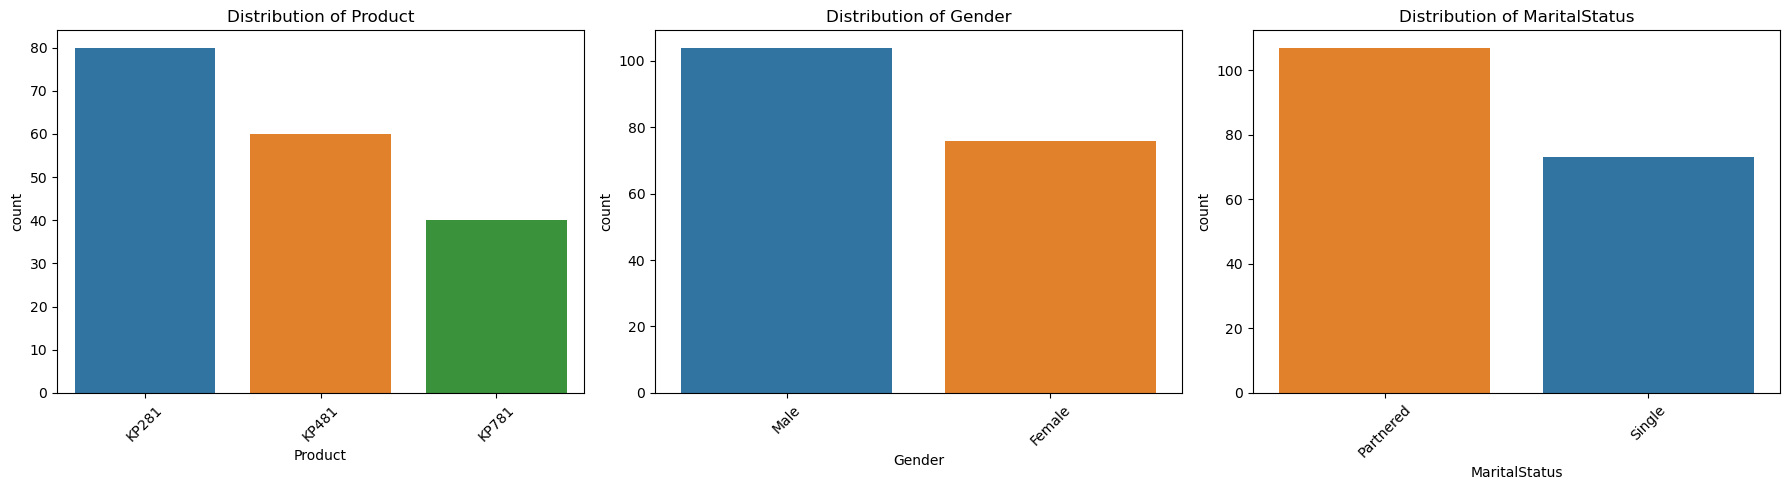

In [194]:
# Create subplots side by side(categorical columns)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i],hue=col,legend=False, order=df[col].value_counts().index)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 📌 Univariate Analysis – Categorical Columns

#### Product
- **KP281** is the most chosen.
- **KP781** is the least chosen.

#### Gender
- More **male** users than female.

#### Marital Status
- Majority are **partnered**.

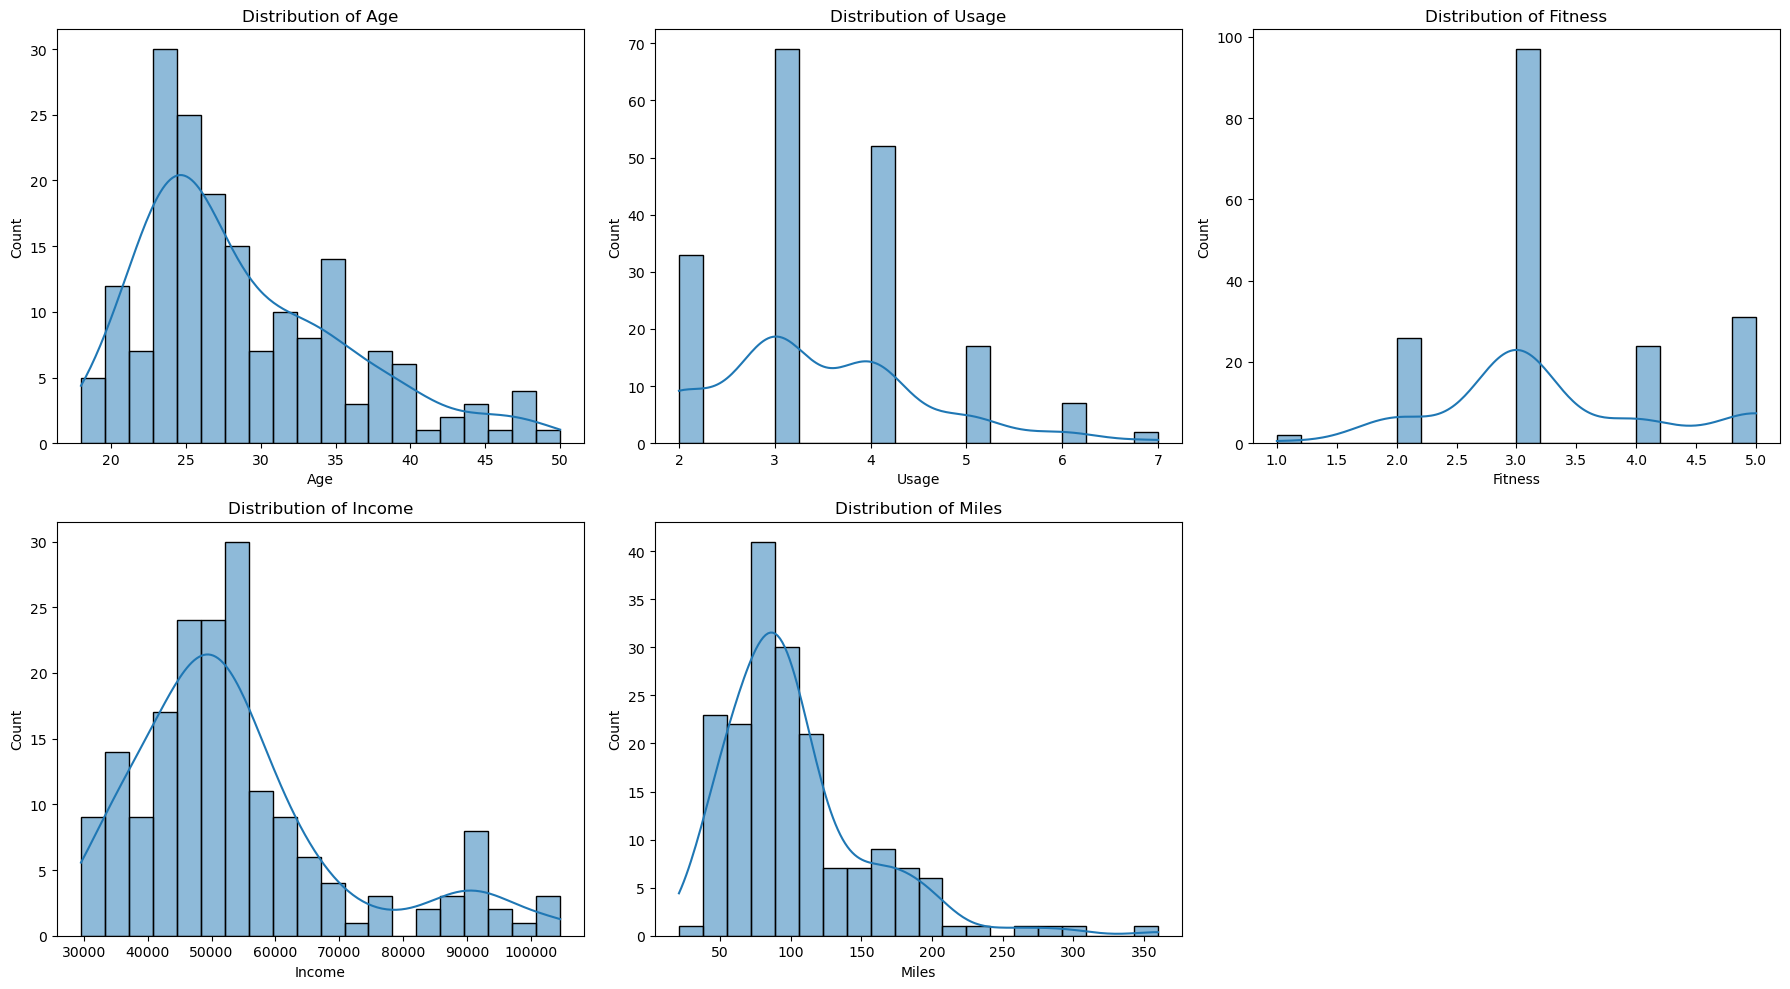

In [198]:
# Create subplots side by side(numerical columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f'Distribution of {col}')

# If there are fewer numerical columns than subplots, hide extra axes
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 📌 Univariate Analysis – Numerical Columns

####  Age
- Most users are **between 18–25**.
- Right-skewed distribution.

####  Usage
- Usage scores peak at **3 and 4**.

####  Fitness
- Most users rated their fitness as **3**.
- Ratings of **1 and 5** are less common.

#### Income
- Income is **skewed right**.
- Most users earn **below 60K**.

####  Miles
- Majority travel **under 150 miles**.
- Long-distance users are few.

In [22]:
# Creating a copy of the dataframe
df_copy = df.copy()

In [23]:
# Replacing categorical values with numeric values and handling downcasting
df_copy['Gender'] = df_copy['Gender'].replace(['Male', 'Female'], [1, 0]).astype('int8')
df_copy['MaritalStatus'] = df_copy['MaritalStatus'].replace(['Single', 'Partnered'], [0, 1]).astype('int8')
df_copy['Product'] = df_copy['Product'].replace(['KP281', 'KP481', 'KP781'], [0, 1, 2]).astype('int8')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15424\1416172766.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['Gender'] = df_copy['Gender'].replace(['Male', 'Female'], [1, 0]).astype('int8')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15424\1416172766.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['MaritalStatus'] = df_copy['MaritalStatus'].replace(['Single', 'Partnered'], [0, 1]).astype('int8')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15424\1416172766.py:4: FutureWarning: Downcasting behavior in `replac

In [24]:
# Calculating the correlation matrix
correlation_matrix = df_copy.corr()

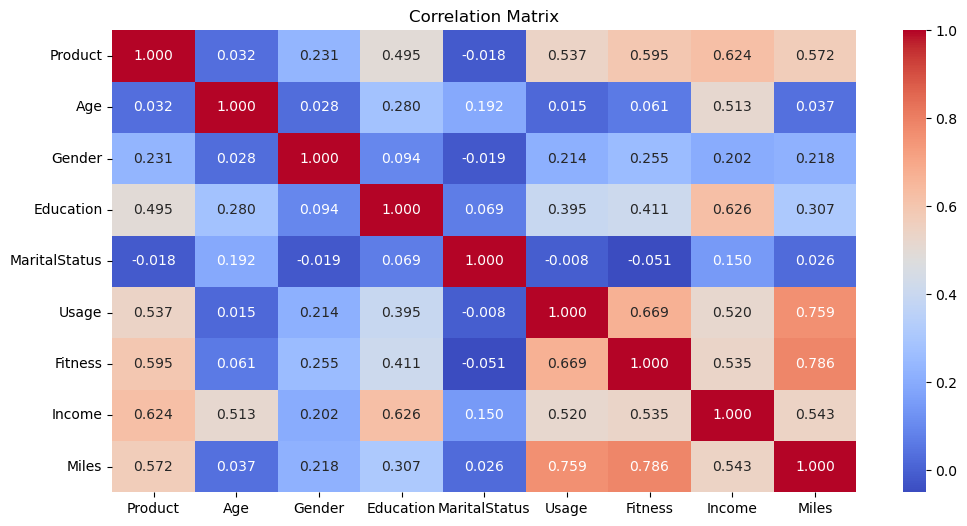

In [25]:
# Visualizing the correlation matrix with a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', cbar=True)
plt.title('Correlation Matrix')
plt.show()

# Observations from the Correlation Matrix

1. Usage, Fitness, and Income appear to be strongly interconnected.Those who use the product more tend to have better fitness levels,higher incomes, and travel more miles.
2. Product type is moderately correlated with Income, Usage, and Fitness.This suggests that certain products may be preferred by individuals with higher income or greater fitness.
3. Gender and MaritalStatus show minimal correlation with other variables,indicating that these factors don't play a strong role in the relationships within this dataset.
4. Age does not seem to have a significant impact on other attributes.

## 📌 plot_outliers(df, column_name)
- This function detects and visualizes outliers in a specified numeric column of a DataFrame using the IQR method:
- Calculates Q1, Q3, and IQR to determine lower and upper bounds.
- Identifies outliers below Q1 – 1.5×IQR or above Q3 + 1.5×IQR.
- Prints outlier values with their indices.
- Displays a boxplot with red dots marking outliers.

In [28]:
def plot_outliers(df, column_name):
    col = df[column_name]

    q1 = np.percentile(col, 25)
    q3 = np.percentile(col, 75)
    iqr = 1.5 * (q3 - q1)
    lower = q1 - iqr
    upper = q3 + iqr
    outliers = col[(col < lower) | (col > upper)]
     # Print outliers
    print(f"\nOutliers in '{column_name}':\n", outliers.to_string(index=True))

    sns.boxplot(x=col)
    sns.stripplot(x=outliers, color='red')
    plt.title(f'Outliers in "{column_name}"')
    plt.show()


Outliers in 'Age':
 78     47
79     50
139    48
178    47
179    48


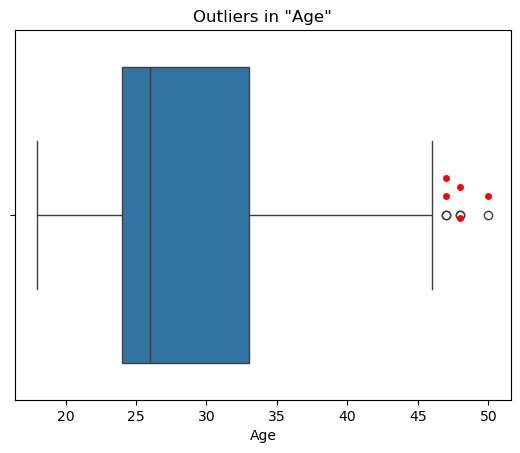

In [29]:
plot_outliers(df, 'Age')


Outliers in 'Income':
 159     83416
160     88396
161     90886
162     92131
164     88396
166     85906
167     90886
168    103336
169     99601
170     89641
171     95866
172     92131
173     92131
174    104581
175     83416
176     89641
177     90886
178    104581
179     95508


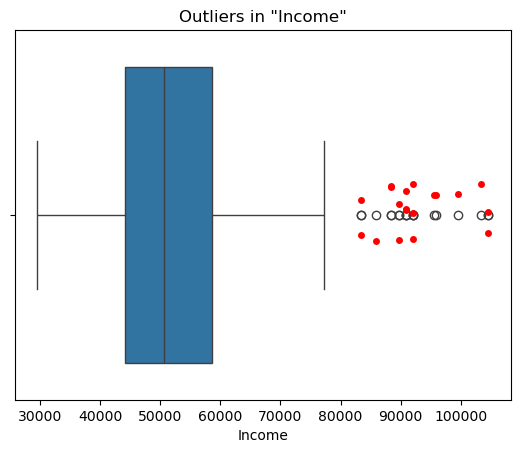

In [30]:
plot_outliers(df, 'Income')


Outliers in 'Miles':
 23     188
84     212
142    200
148    200
152    200
155    240
166    300
167    280
170    260
171    200
173    360
175    200
176    200


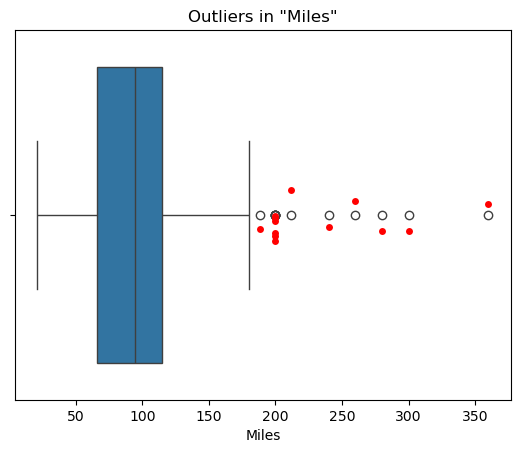

In [31]:
plot_outliers(df, 'Miles')

Certainly there are outliers in our data. When we remove them, this leads to loss of information and moreover we have a very small dataset of 180 rows. So instead of removing, it's going to be clipped (i.e. - ranges between 5 percentile and 95 percentile).

In [33]:
def clip_columns(df, columns):
    for col in columns:
        p = df[col].quantile([0.05, 0.95]).values
        df_copy[col] = np.clip(df[col], p[0], p[1])

In [34]:
clip_columns(df_copy, ['Age', 'Income', 'Miles'])

In [35]:
print(df_copy[['Age', 'Income', 'Miles']].describe())

              Age        Income       Miles
count  180.000000    180.000000  180.000000
mean    28.641389  53477.070000  101.088889
std      6.446373  15463.662523   43.364286
min     20.000000  34053.150000   47.000000
25%     24.000000  44058.750000   66.000000
50%     26.000000  50596.500000   94.000000
75%     33.000000  58668.000000  114.750000
max     43.050000  90948.250000  200.000000


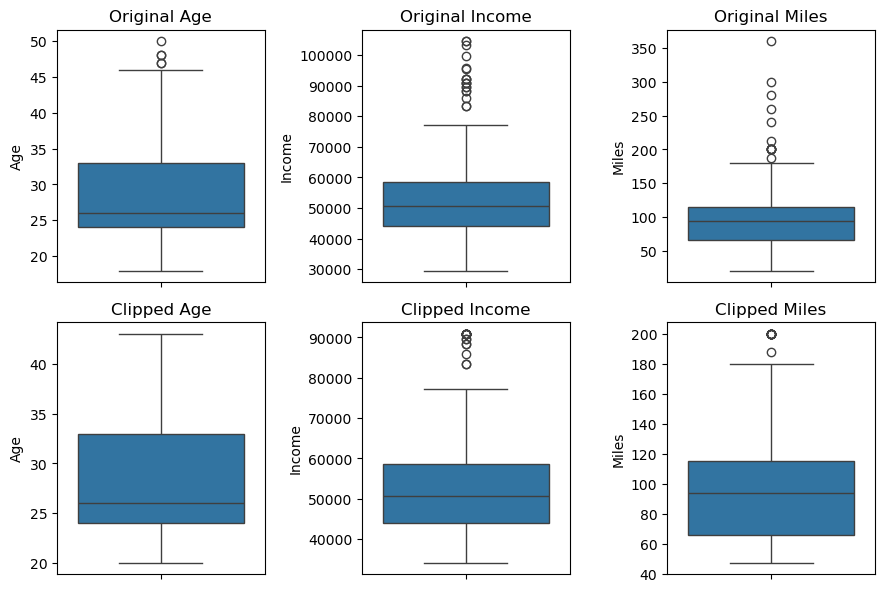

In [36]:
# Continuous columns
continuous_cols = ['Age', 'Income', 'Miles']

# Plot original boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(continuous_cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Original {col}')

# Plot clipped boxplots
for i, col in enumerate(continuous_cols):
    plt.subplot(2, 4, i+5)
    sns.boxplot(y=df_copy[col])
    plt.title(f'Clipped {col}')

plt.tight_layout()
plt.show()

#### Scatterplots for Analysis of Continuous Variables -

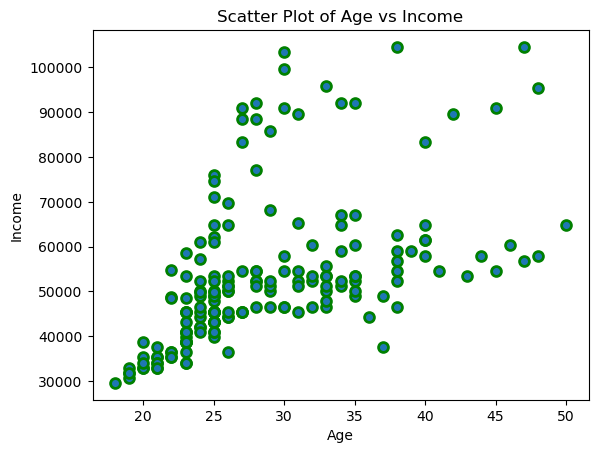

In [38]:
# Observing the association between Age and Income -

plt.scatter(df['Age'], df['Income'],linewidths = 2,marker ="o",edgecolor ="green",s = 50)
# Add x-axis and y-axis labels
plt.xlabel("Age")
plt.ylabel("Income")

# Optional: Add a title for clarity
plt.title("Scatter Plot of Age vs Income")

# Display the plot
plt.show()

As Age increases, the variance (spread) in Income also increases.
The variance of income in lower ages is smaller as compared to the variance in higher ages, probably something called as **Heteroscadasticity**.

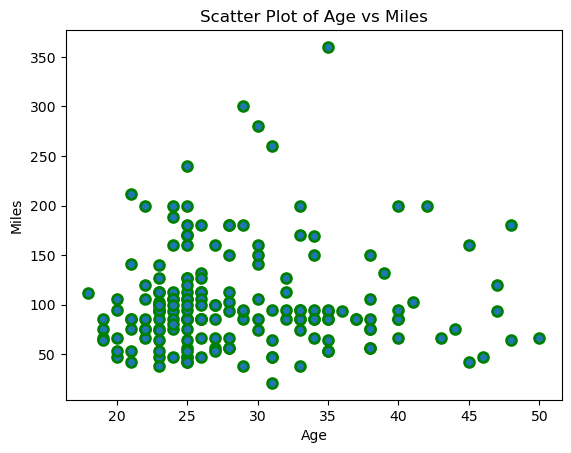

In [40]:
# Observing the association between Age and Miles -

plt.scatter(df['Age'], df['Miles'],linewidths = 2,marker ="o",edgecolor ="green",s = 50)
# Add x-axis and y-axis labels
plt.xlabel("Age")
plt.ylabel("Miles")

# Optional: Add a title for clarity
plt.title("Scatter Plot of Age vs Miles")

# Display the plot
plt.show()

-No significant pattern: As age increases or decreases, the number of miles run doesn’t show a consistent increase or decrease.
-In a scatter plot, the points would look like a cloud — no clear trend.
-In a correlation heatmap correlation of 0.037. reflecting weak correlation.

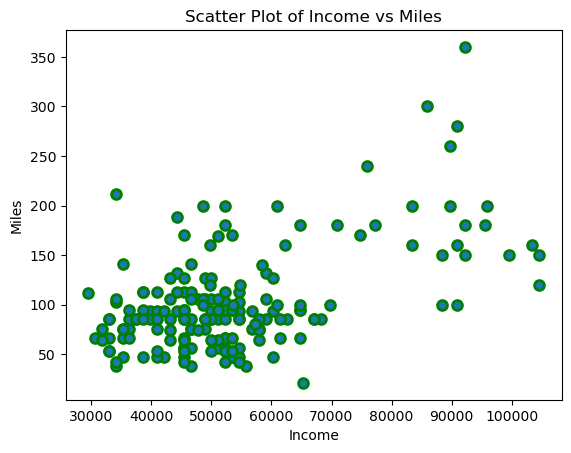

In [42]:
# Observing the association between Miles and Income -

plt.scatter(df['Income'], df['Miles'],linewidths = 2,marker ="o",edgecolor ="green",s = 50)
# Add x-axis and y-axis labels
plt.xlabel("Income")
plt.ylabel("Miles")

# Optional: Add a title for clarity
plt.title("Scatter Plot of Income vs Miles")

# Display the plot
plt.show()

-As Income increases, Miles run on the treadmill tend to increase.Especially notable: Only those earning >70,000 have run over 220 miles.
-This suggests that higher-income individuals may be more health-conscious, have more access to fitness resources, or simply have more leisure time.
-Heteroscedasticity is observed as the variance in Miles increases with Income — lower-income groups show low and consistent mileage, while higher-income groups display a wide range in treadmill usage.

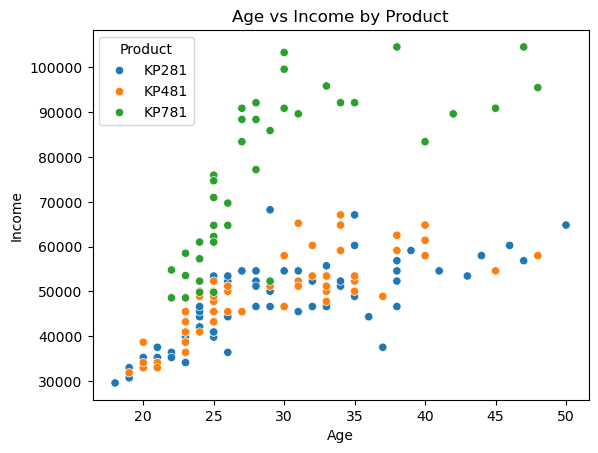

In [44]:
# Income vs Age, colored by Product
sns.scatterplot(data=df, x='Age', y='Income', hue='Product')
plt.title('Age vs Income by Product')
plt.show()

-Income is a strong differentiator between products.
-KP781 is distinctly positioned for wealthier customers, while KP281 and KP481 cater to moderate income groups, with KP481 serving a slightly more mature segment.

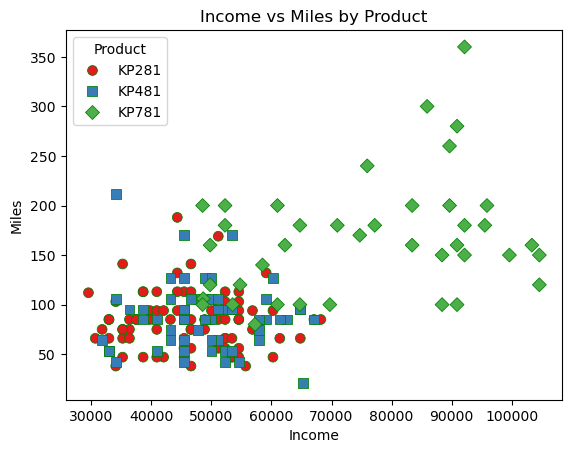

In [46]:
# Observing the association between Miles and Income with style and color by 'Product'
sns.scatterplot(data=df, x='Income', y='Miles', hue='Product', style='Product', palette='Set1', 
                markers=['o', 's', 'D'], edgecolor='green', s=50)

plt.title('Income vs Miles by Product')
plt.show()

### 📊 Insights from Income vs Miles by Product

#### **KP781 (Green Diamonds):**
- Dominates the **higher income** and **long-distance travel** segment.
- Many customers earning **above 70,000** are associated with this product.
- This suggests **KP781** might be targeted at or preferred by **affluent and far-traveling customers**.

#### **KP281 (Red Circles)** and **KP481 (Blue Squares):**
- Mostly clustered in **lower to mid-income (30,000–60,000)** and **shorter travel distances (<150 miles)**.
- These may be **mass-market products** catering to **local or regional customers**.

#### **Pattern Observation:**
- There's a **clear positive shift** in both **income and miles** for KP781.
- You might explore **product positioning** or **marketing segmentation** based on this pattern.

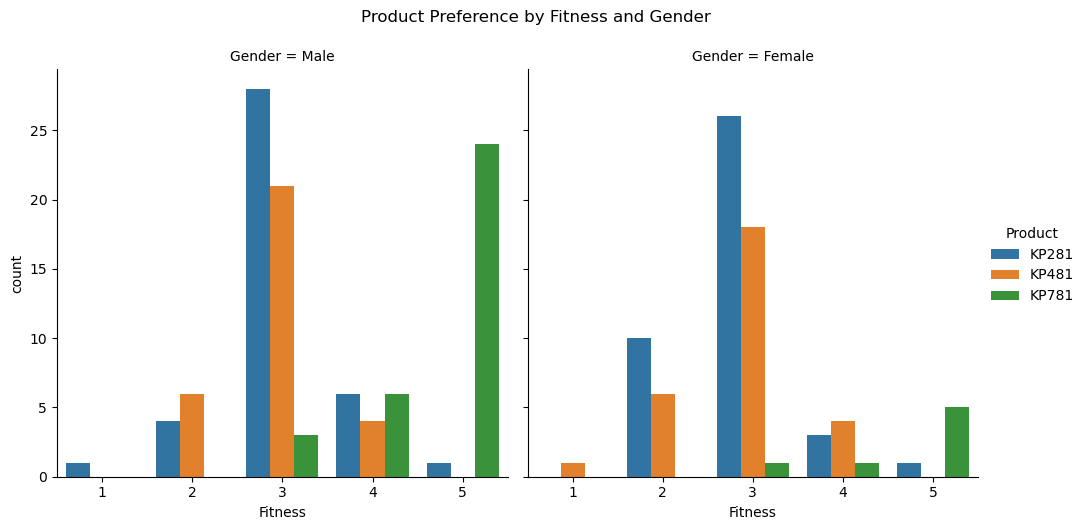

In [48]:
sns.catplot(data=df, x='Fitness', hue='Product', col='Gender', kind='count')
plt.suptitle("Product Preference by Fitness and Gender", y=1.05)
plt.show()

### 🏋️‍♂️ Product Preference by Fitness Level & Gender

- **KP281**: Popular among both genders with **moderate fitness (level 3)**.
- **KP481**: Preferred by **males** at **fitness level 3**.
- **KP781**: Strong preference among **highly fit individuals (level 5)**, especially **males**.

📌 **Summary**:  
- High fitness → **KP781**  
- Moderate fitness → **KP281 & KP481**  
- Males show wider spread in product choices.

<Axes: xlabel='Gender', ylabel='Miles'>

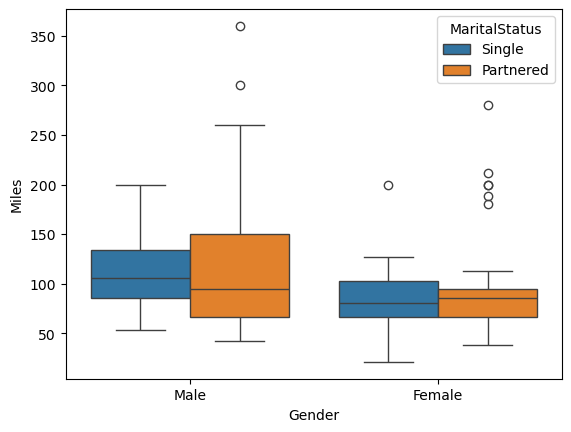

In [50]:
sns.boxplot(df, x = "Gender", y = "Miles", hue = "MaritalStatus")
# Men expect themselves to run more than women. Single men want to run more than partnered men,
# whereas partnered men and women have more outliers

<Axes: xlabel='Fitness', ylabel='Age'>

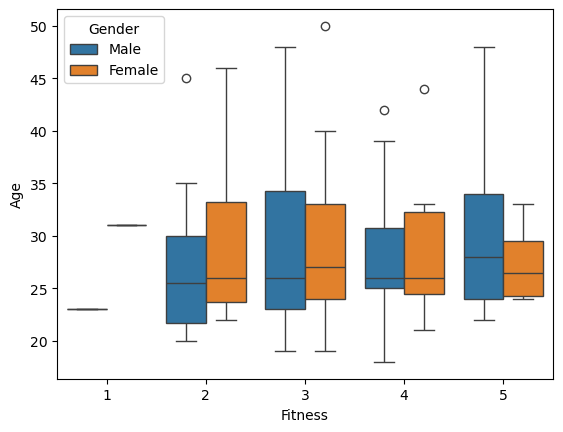

In [51]:
sns.boxplot(df, x = "Fitness", y = "Age", hue = "Gender")
# Females are observed to be older when the fitness range ins from 1-4.

### 🎯 Insight from Fitness vs Age by Gender

- Females tend to be **older** than males at fitness levels **1 to 4**.
- At **fitness level 5**, the age difference between males and females is **minimal**.
- **Males show more variation** in age across fitness levels (wider boxes).
- There are some **outliers**, especially in lower fitness levels.

<Axes: xlabel='Fitness', ylabel='Income'>

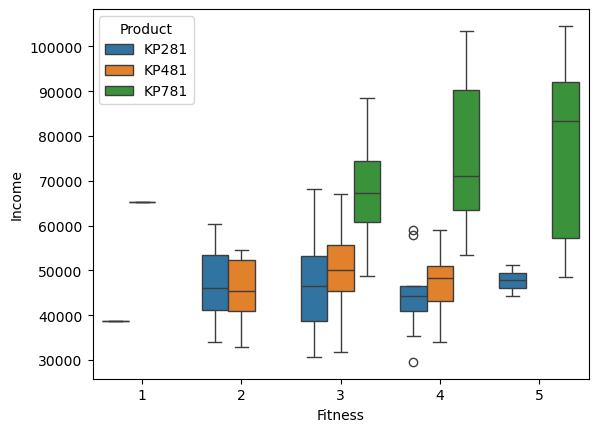

In [53]:
sns.boxplot(df, x = "Fitness", y = "Income", hue = "Product")
# people with high income tend to buy the product 'KP781'
# People with more fitness also tend to have high income

### 📊 Income vs Fitness by Product

- **KP781** (green) shows a clear **positive correlation** between fitness and income.
- **Higher fitness levels (4 & 5)** are associated with **higher income** for KP781 users.
- **KP281** and **KP481** (blue & orange) have **lower and more consistent income** across fitness levels.
- **Outliers** are present in fitness levels 3 & 4, indicating variability.
- **KP781** is likely a **premium product** preferred by **high-income, high-fitness** individuals.

### Function: `plot_distribution`
This function plots a histogram with a Kernel Density Estimate (KDE) for a given numeric column in the dataframe. It allows customization of the number of bins and the color of the plot.


In [56]:
def plot_distribution(df, column_name, bins=30, color='darkblue'):
    """
    Plots a histogram with KDE for a given numeric column in the dataframe.
    
    Parameters:
    - df: pandas DataFrame
    - column_name: str, column to plot
    - bins: int, number of histogram bins
    - color: str, color of the plot
    """
    sns.histplot(df[column_name], kde=True, bins=bins,
                 color=color, edgecolor='black', linewidth=1.5)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

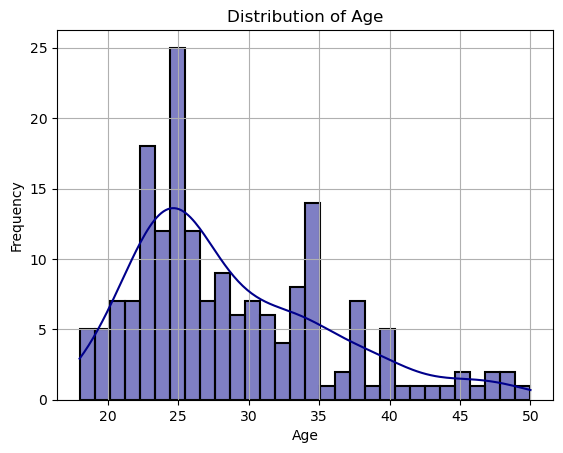

In [57]:
plot_distribution(df, 'Age')

In [58]:
bins = [0, 25, 35, 50]
labels = ['Young(<25)', ' Core group(25–35)', ' Older(35+)']
df['Age_bins'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins
0,KP281,18,Male,14,Single,3,4,29562,112,Young(<25)
1,KP281,19,Male,15,Single,2,3,31836,75,Young(<25)
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young(<25)
3,KP281,19,Male,12,Single,3,3,32973,85,Young(<25)
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young(<25)


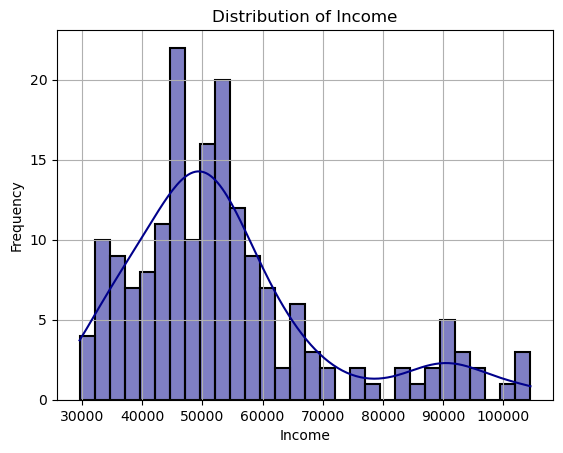

In [59]:
plot_distribution(df, 'Income')

In [60]:
# Creating bins for income -
bins = [-1, 40000, 60000, 80000, 100000, 120000]
labels = ['<40K', '40–60K', '60–80K', '80–100K', '100K+']
df['Income_bins'] = pd.cut(df['Income'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins
0,KP281,18,Male,14,Single,3,4,29562,112,Young(<25),<40K
1,KP281,19,Male,15,Single,2,3,31836,75,Young(<25),<40K
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young(<25),<40K
3,KP281,19,Male,12,Single,3,3,32973,85,Young(<25),<40K
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young(<25),<40K


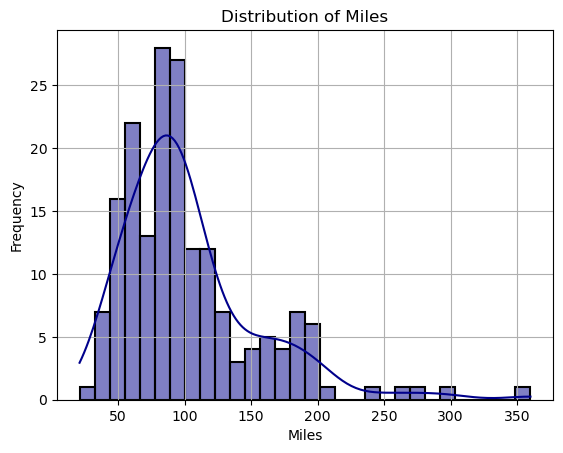

In [61]:
plot_distribution(df, 'Miles')

In [62]:
# Creating bins for miles -
bins = [0, 100, 200, 400]
labels = ['Short (<100 miles)', ' Medium (100–200 miles)', 'Long (200+ miles)']
df['Mile_bins'] = pd.cut(df['Miles'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins,Mile_bins
0,KP281,18,Male,14,Single,3,4,29562,112,Young(<25),<40K,Medium (100–200 miles)
1,KP281,19,Male,15,Single,2,3,31836,75,Young(<25),<40K,Short (<100 miles)
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young(<25),<40K,Short (<100 miles)
3,KP281,19,Male,12,Single,3,3,32973,85,Young(<25),<40K,Short (<100 miles)
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young(<25),<40K,Short (<100 miles)


In [63]:
def show_group_profile(df, *group_cols, target_col='Product', normalize='index', plot=True, show_combined=True):
    """
    Shows combined raw and proportion crosstabs side by side.

    Parameters:
    - df: DataFrame
    - *group_cols: columns to group by (e.g., 'Gender', 'Income_bins')
    - target_col: column representing the target category (default='Product')
    - normalize: how to normalize proportions ('index', 'columns', or None)
    - plot: plot the proportion data as stacked bar (default=True)
    - show_combined: if True, returns a single DataFrame with counts & proportions
    """

    if len(group_cols) < 1:
        raise ValueError("You must provide at least one column to group by.")

    # Crosstabs
    raw_ct = pd.crosstab(index=[df[col] for col in group_cols], columns=df[target_col])
    prop_ct = pd.crosstab(index=[df[col] for col in group_cols], columns=df[target_col], normalize=normalize)

    # Combine raw and proportion tables side by side
    if show_combined:
        combined = pd.concat(
            [raw_ct.add_suffix(' | Count'), prop_ct.add_suffix(' | %')],
            axis=1
        )
        display(combined)
    else:
        display(raw_ct)
        display(prop_ct)

    # Optional plot
    if plot:
        prop_ct.plot(kind='bar', figsize=(10, 4), stacked=True)
        plt.title(f"Proportion of Each {target_col} Purchased by {', '.join(group_cols)}")
        plt.ylabel("Proportion" if normalize else "Count")
        plt.xlabel(', '.join(group_cols))
        plt.xticks(rotation=45, ha='right')
        plt.legend(title=target_col, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()


In [64]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'Age_bins', 'Income_bins', 'Mile_bins'],
      dtype='object')

Product,KP281 | Count,KP481 | Count,KP781 | Count,KP281 | %,KP481 | %,KP781 | %
Gender,,,,,,
Female,40,29,7,0.526316,0.381579,0.092105
Male,40,31,33,0.384615,0.298077,0.317308


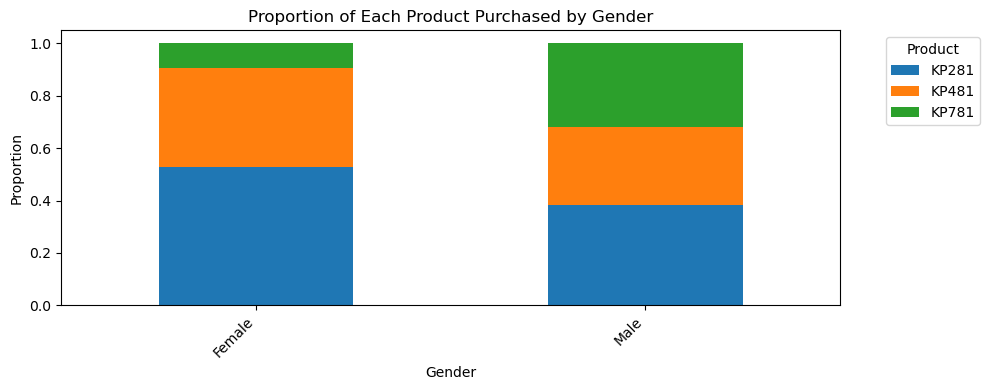

In [65]:
show_group_profile(df, 'Gender')

### 🔑 Key Insights

✅ **KP281** is universally popular — it's the most chosen product overall.

🚹 **KP781** is strongly male-skewed — potentially marketed more effectively toward or better aligned with male preferences.

🚺 **Females** show clear preference concentration on **KP281** and **KP481**, with minimal interest in KP781.

⚠️ **KP781** has a gender imbalance — this could be an opportunity to explore why females are less interested and whether the product can be repositioned.

Product,KP281 | Count,KP481 | Count,KP781 | Count,KP281 | %,KP481 | %,KP781 | %
Income_bins,,,,,,
<40K,23,9,0,0.718750,0.281250,0.000000
40–60K,51,44,11,0.481132,0.415094,0.103774
60–80K,6,7,10,0.260870,0.304348,0.434783
80–100K,0,0,16,0.000000,0.000000,1.000000
100K+,0,0,3,0.000000,0.000000,1.000000


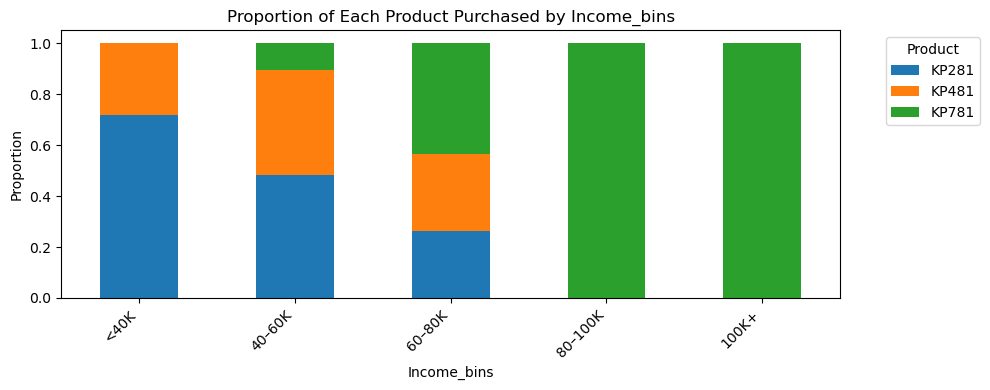

In [67]:
show_group_profile(df, 'Income_bins')

### 🔑 Key Insights by Income Group

💰 **<40K Segment:**
- KP281 is the overwhelming favorite (72%).
- No interest in KP781 at all.

💰 **40–60K Segment:**
- Balanced preference for KP281 (48%) and KP481 (42%).
- KP781 is just emerging (10%).

💰 **60–80K Segment:**
- Preference shifts toward KP781 (43%), overtaking KP281 and KP481.

💰 **80–100K and 100K+ Segments:**
- Exclusive interest in **KP781** (100% of choices).
- KP281 and KP481 are completely ignored.

🎯 **Overall Insight:**
- KP281 appeals strongly to **lower income groups**.
- KP781 is a **premium product**, gaining popularity as income increases.
- KP481 sits in the middle, appealing most to mid-income consumers.


Product             KP281 | Count  KP481 | Count  KP781 | Count  KP281 | %  \
Gender Income_bins                                                           
Female <40K                    13              2              0   0.866667   
       40–60K                  23             23              2   0.479167   
       60–80K                   4              4              2   0.400000   
       80–100K                  0              0              3   0.000000   
Male   <40K                    10              7              0   0.588235   
       40–60K                  28             21              9   0.482759   
       60–80K                   2              3              8   0.153846   
       80–100K                  0              0             13   0.000000   
       100K+                    0              0              3   0.000000   

Product             KP481 | %  KP781 | %  
Gender Income_bins                        
Female <40K          0.133333   0.000000  
       40–60K        0.479167   0.041667  
       60–80K        0.400000   0.200000  
       80–100K       0.000000   1.000000  
Male   <40K          0.411765   0.000000  
       40–60K        0.362069   0.155172  
       60–80K        0.230769   0.615385  
       80–100K       0.000000   1.000000  
       100K+         0.000000   1.000000

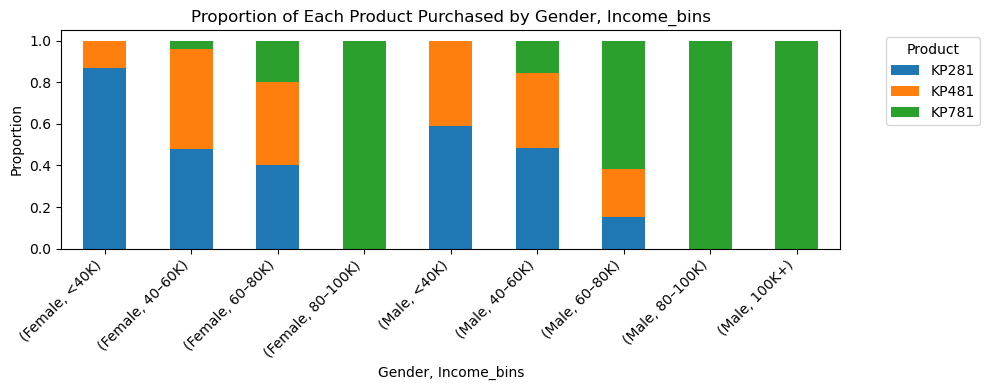

In [69]:
show_group_profile(df, 'Gender', 'Income_bins')

### 🔑 Key Insights: Gender & Income-Level Analysis

#### 🚺 Female Consumers:
- In the **<40K** group, females heavily prefer **KP281** (87%), with **no interest in KP781**.
- At **40–60K**, preference is evenly split between **KP281** and **KP481** (48% each), showing openness to both.
- In **higher income tiers**, KP781 begins to appear, becoming the **sole choice** in the 80–100K group — **potential indicator of premium appeal**.

#### 🚹 Male Consumers:
- In the **<40K** group, KP281 still leads (59%), but KP481 has more traction compared to females.
- As income increases:
  - KP781 gains momentum, making up **62% in the 60–80K** segment.
  - At **80–100K and 100K+**, males exclusively choose KP781.

#### 💡 Combined Insight:
- **KP281** is the default preference at lower income levels for both genders.
- **KP781** is **gender-neutral** at high income levels — chosen exclusively by both males and females earning above 80K.
- **Females switch to KP781 later** than males in income progression, hinting at different **perceived value thresholds**.
- **KP481** performs best among **mid-income females**, suggesting a targeted opportunity.


Product,KP281 | Count,KP481 | Count,KP781 | Count,KP281 | %,KP481 | %,KP781 | %
Age_bins,,,,,,
Young(<25),34,28,17,0.430380,0.354430,0.215190
Core group(25–35),32,24,17,0.438356,0.328767,0.232877
Older(35+),14,8,6,0.500000,0.285714,0.214286


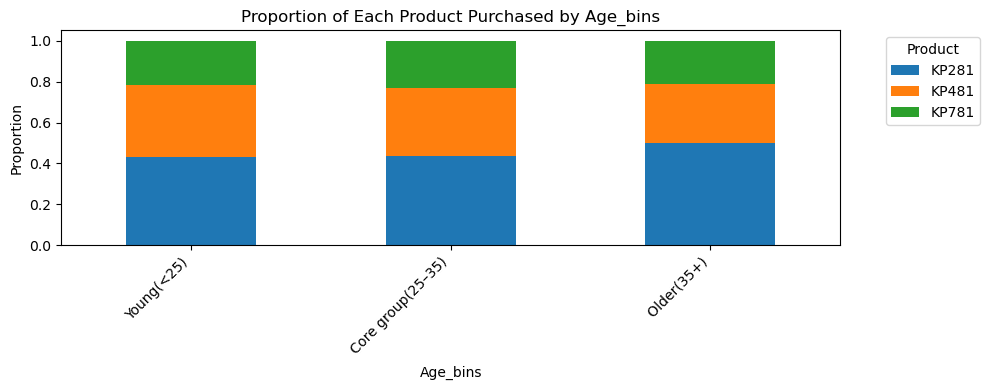

In [71]:
show_group_profile(df, 'Age_bins')

### 🔑 Key Insights: Product Preference by Age Group

👶 **Young (<25)**:
- KP281 is the most popular (43%), followed by KP481 (35%) and KP781 (21%).
- Youth are relatively **open to exploring all 3 products**, with balanced distribution.

👥 **Core Age Group (25–35)**:
- KP281 maintains top preference (44%) but KP781 interest slightly **increases** (23%).
- KP481 sees a **dip** compared to the younger segment.

👴 **Older (35+)**:
- KP281 dominates even more (50%), indicating a **strong preference for familiar/reliable options**.
- KP781 (21%) holds steady, while KP481 drops to 29%.

🧠 **Combined Insight**:
- **KP281** is a consistent leader across all age groups.
- **KP781 interest increases slightly with age**, peaking in the 25–35 group.
- **KP481** is most popular among the young, but declines with age — possibly perceived as a trendier or experimental product.

Product,KP281 | Count,KP481 | Count,KP781 | Count,KP281 | %,KP481 | %,KP781 | %
Fitness,,,,,,
1,1,1,0,0.500000,0.500000,0.000000
2,14,12,0,0.538462,0.461538,0.000000
3,54,39,4,0.556701,0.402062,0.041237
4,9,8,7,0.375000,0.333333,0.291667
5,2,0,29,0.064516,0.000000,0.935484


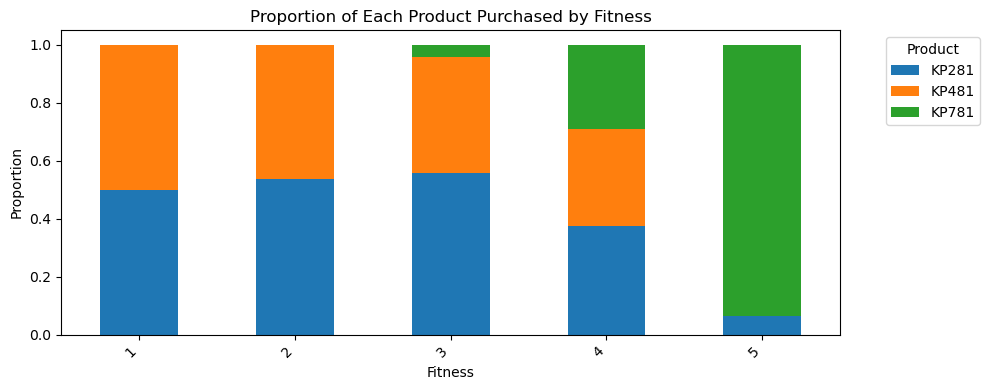

In [73]:
show_group_profile(df, 'Fitness')

### 🔑 Key Insights: Fitness and Product Choice

💪 **Fitness Level 1–3 (Low to Moderate Fitness)**:
- **KP281 dominates** as the most preferred product (around 50–56%).
- KP781 is barely considered among these groups.
- Consumers with lower fitness levels lean toward **KP281 and KP481**, likely due to broader accessibility or comfort.

⚖️ **Fitness Level 4 (Moderate-High)**:
- Preferences begin to **diversify**.
- KP281 and KP481 still lead (38% and 33%), but **KP781 jumps to 29%**.

🏋️ **Fitness Level 5 (High Fitness)**:
- A striking **93.55% prefer KP781** — this product likely appeals to highly active individuals.
- KP281 and KP481 are almost **completely rejected**.

🧠 **Overall Insight**:
- **KP781 is a niche product** that **strongly resonates with highly fit individuals**.
- **KP281 is a mass-market product**, preferred across the general population, especially with lower fitness.
- **Targeted marketing** could position KP781 as a premium/high-performance option, while KP281 can maintain broad appeal.

Product                     KP281 | Count  KP481 | Count  KP781 | Count  \
Age_bins           Fitness                                                
Young(<25)         1                    1              0              0   
                   2                    6              7              0   
                   3                   23             17              2   
                   4                    3              4              3   
                   5                    1              0             12   
 Core group(25–35) 1                    0              1              0   
                   2                    7              4              0   
                   3                   20             15              2   
                   4                    4              4              3   
                   5                    1              0             12   
 Older(35+)        2                    1              1              0   
                   3                   11              7              0   
                   4                    2              0              1   
                   5                    0              0              5   

Product                     KP281 | %  KP481 | %  KP781 | %  
Age_bins           Fitness                                   
Young(<25)         1         1.000000   0.000000   0.000000  
                   2         0.461538   0.538462   0.000000  
                   3         0.547619   0.404762   0.047619  
                   4         0.300000   0.400000   0.300000  
                   5         0.076923   0.000000   0.923077  
 Core group(25–35) 1         0.000000   1.000000   0.000000  
                   2         0.636364   0.363636   0.000000  
                   3         0.540541   0.405405   0.054054  
                   4         0.363636   0.363636   0.272727  
                   5         0.076923   0.000000   0.923077  
 Older(35+)        2         0.500000   0.500000   0.000000  
                   3         0.611111   0.388889   0.000000  
                   4         0.666667   0.000000   0.333333  
                   5         0.000000   0.000000   1.000000

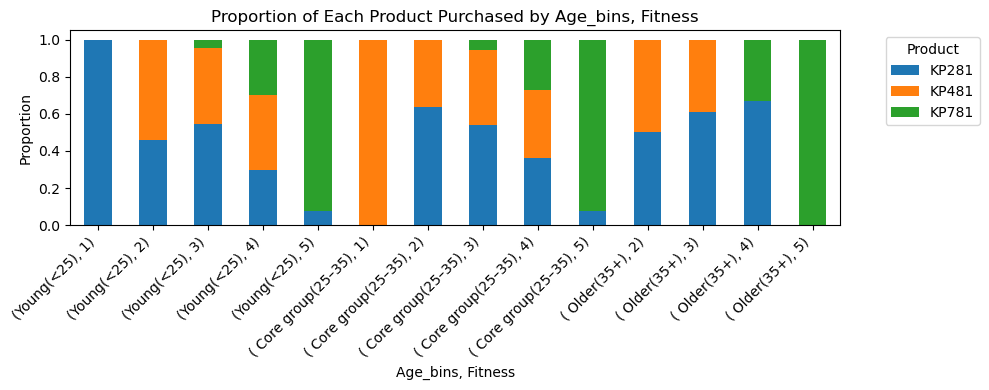

In [75]:
show_group_profile(df, 'Age_bins', 'Fitness')

### 🔑 Key Insights: Product Preferences by Age & Fitness

✅ **Across All Age Groups**:
- **KP281** is the **default favorite** across lower fitness levels (1–3).
- **KP781** becomes **highly dominant only at Fitness Level 5**, regardless of age.

👶 **Young (<25)**:
- Strong preference for **KP281 and KP481** up to Fitness Level 4.
- At Fitness Level 5, **KP781 skyrockets to 92%**, signaling a strong affinity among fit youth.

🧑 **Core Group (25–35)**:
- Shows very **balanced product preference** at moderate fitness (2–4).
- Fitness Level 5 again shifts focus sharply to **KP781 (92%)**, echoing the younger group’s trend.

👴 **Older (35+)**:
- Preference is **heavily concentrated on KP281** at low and mid fitness.
- **Only at Fitness Level 5** do they fully shift to **KP781 (100%)**.

🧠 **Strategic Takeaway**:
- **KP781** should be marketed as a **premium/high-performance product**, ideal for fit consumers of **any age**.
- **KP281** can be retained as a **versatile, widely appealing product** for the general population.
- **KP481** may require **repositioning** or feature enhancements to differentiate itself further, especially as its share doesn't significantly rise in any segment.

Product,KP281 | Count,KP481 | Count,KP781 | Count,KP281 | %,KP481 | %,KP781 | %
Usage,,,,,,
2,19,14,0,0.575758,0.424242,0.000000
3,37,31,1,0.536232,0.449275,0.014493
4,22,12,18,0.423077,0.230769,0.346154
5,2,3,12,0.117647,0.176471,0.705882
6,0,0,7,0.000000,0.000000,1.000000
7,0,0,2,0.000000,0.000000,1.000000


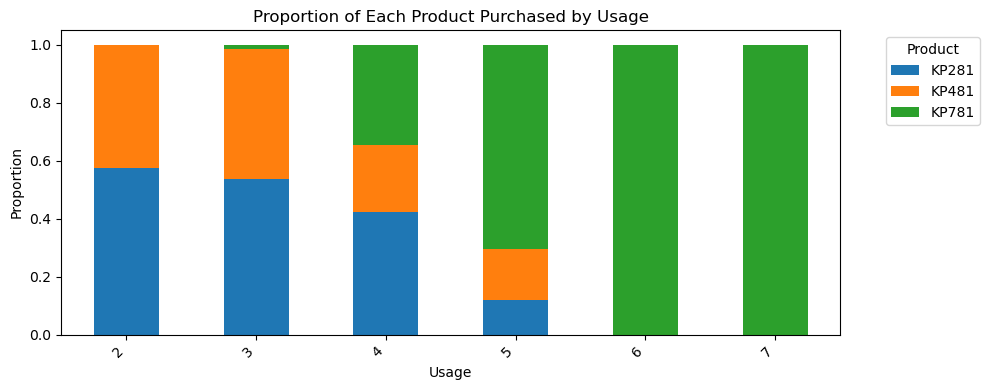

In [77]:
show_group_profile(df, 'Usage')

### 🔑 Key Insights: Product Preferences by Usage Level

🟢 **Low to Moderate Usage (2–3)**:
- **KP281** is the clear favorite, with over 53% share.
- **KP481** maintains strong second place.
- **KP781** has minimal or zero adoption.

🟡 **Usage Level 4**:
- Shift starts to happen—**KP781 jumps to 34.6%**, while **KP281** and **KP481** drop.

🔴 **High Usage (5–7)**:
- **KP781 dominates**:
  - **70.6% at Level 5**
  - **100% at Levels 6 and 7**
- Indicates a strong association of KP781 with **heavy or advanced users**.

🧠 **Strategic Takeaway**:
- **KP781** is the product of choice for **high-usage individuals**—market it as a **premium, performance-focused option**.
- **KP281 and KP481** remain competitive for **light to moderate users**—consider bundling or discounts for entry-level usage.


Product       KP281 | Count  KP481 | Count  KP781 | Count  KP281 | %  \
Gender Usage                                                           
Female 2                 13              7              0   0.650000   
       3                 19             14              0   0.575758   
       4                  7              5              2   0.500000   
       5                  1              3              3   0.142857   
       6                  0              0              2   0.000000   
Male   2                  6              7              0   0.461538   
       3                 18             17              1   0.500000   
       4                 15              7             16   0.394737   
       5                  1              0              9   0.100000   
       6                  0              0              5   0.000000   
       7                  0              0              2   0.000000   

Product       KP481 | %  KP781 | %  
Gender Usage                        
Female 2       0.350000   0.000000  
       3       0.424242   0.000000  
       4       0.357143   0.142857  
       5       0.428571   0.428571  
       6       0.000000   1.000000  
Male   2       0.538462   0.000000  
       3       0.472222   0.027778  
       4       0.184211   0.421053  
       5       0.000000   0.900000  
       6       0.000000   1.000000  
       7       0.000000   1.000000

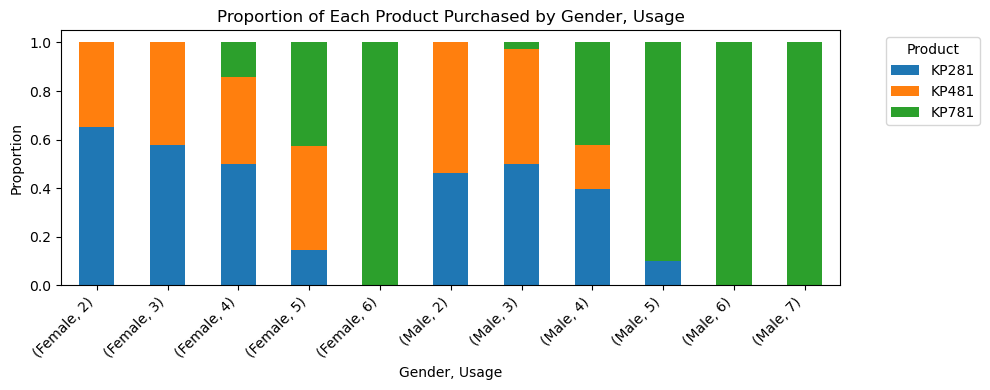

In [79]:
show_group_profile(df, 'Gender', 'Usage')

### 🔑 Gender-wise Insights: Usage Trends & Product Preference

👩 **Female Users**:
- Strong preference for **KP281** and **KP481** at lower usage levels (2–3).
- Gradual entry of **KP781** at Usage Level 4.
- Equal preference for **KP481 and KP781** at Level 5 (42.86% each).
- **KP781 dominates at Level 6 (100%)**, suggesting it's the choice for more engaged female users.

👨 **Male Users**:
- Balanced preference for KP281 and KP481 at Levels 2–3.
- **KP781 rapidly overtakes** from Usage Level 4 (42.11%) onward.
- From Level 5 and above, **KP781 becomes the exclusive preference** (90–100%).

📌 **Strategic Takeaways**:
- **KP281 & KP481** serve as **entry-level products**, especially for females.
- **KP781** is a **clear leader among high-usage males**, with earlier adoption than females.
- Use this to **target campaigns**—e.g., promote **KP781 upgrades to males at Usage 4**, and to **females around Usage 5–6**.


Product,KP281 | Count,KP481 | Count,KP781 | Count,KP281 | %,KP481 | %,KP781 | %
MaritalStatus,,,,,,
Partnered,48,36,23,0.448598,0.336449,0.214953
Single,32,24,17,0.438356,0.328767,0.232877


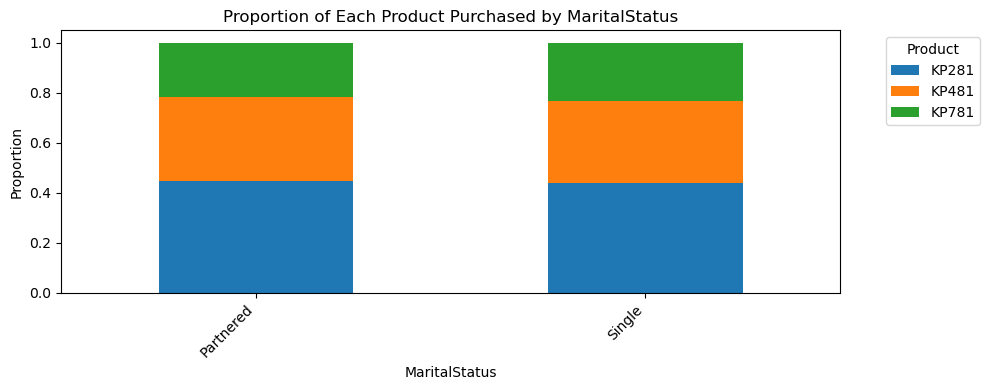

In [81]:
show_group_profile(df, 'MaritalStatus')

### 🔑 Marital Status Insights

💍 **Partnered Individuals**:
- Slightly **higher preference for KP281** (44.86%) and **KP481** (33.64%).
- KP781 is less preferred (21.50%) compared to singles.

💔 **Single Individuals**:
- Nearly equal preference for KP281 (43.84%) and KP481 (32.88%) as partnered people.
- **Higher inclination toward KP781** (23.29%) compared to partnered peers.

📌 **Actionable Insight**:
- **Singles are slightly more experimental** with KP781 than partnered individuals.
- Partnered customers show **more consistent preference** toward traditional products KP281 and KP481.
- Consider **segmenting product recommendations** or promotional strategies based on marital status for improved conversion.

Product               KP281 | Count  KP481 | Count  KP781 | Count  KP281 | %  \
Gender MaritalStatus                                                           
Female Partnered                 27             15              4   0.586957   
       Single                    13             14              3   0.433333   
Male   Partnered                 21             21             19   0.344262   
       Single                    19             10             14   0.441860   

Product               KP481 | %  KP781 | %  
Gender MaritalStatus                        
Female Partnered       0.326087   0.086957  
       Single          0.466667   0.100000  
Male   Partnered       0.344262   0.311475  
       Single          0.232558   0.325581

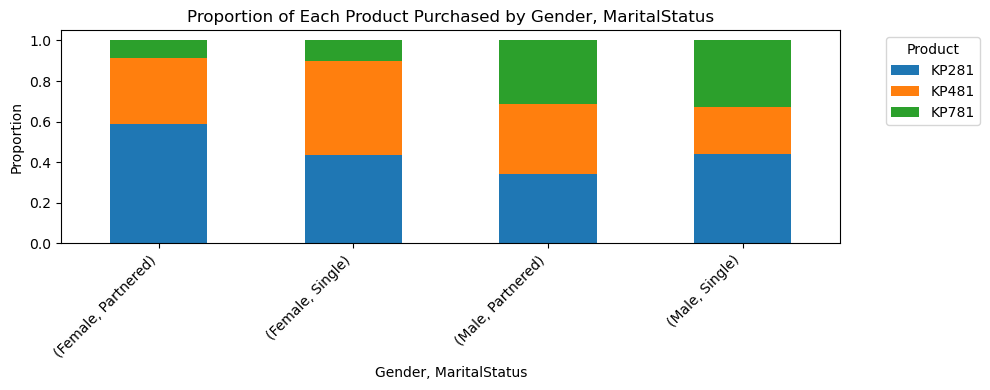

In [83]:
show_group_profile(df, 'Gender', 'MaritalStatus')

### 🔑 Gender × Marital Status Insights

👩 **Females**:
- **Partnered females** show a strong preference for **KP281 (58.7%)**, with lower interest in KP781.
- **Single females** lean slightly more toward **KP481 (46.7%)** than KP281 (43.3%), showing a **divergent preference pattern**.

👨 **Males**:
- **Partnered males** have **balanced preferences between KP281 and KP481 (34.4%)**, but a significantly higher interest in **KP781 (31.1%)** than females.
- **Single males** show the **highest KP781 preference (32.6%)** and a tilt toward **KP281 (44.2%)**.

📌 **Actionable Insight**:
- **KP781** appeals more to **males**, especially **single males**, suggesting targeted marketing could be effective.
- **KP481** finds its strongest audience among **single females**, which could influence branding or messaging.


Product,KP281 | Count,KP481 | Count,KP781 | Count,KP281 | %,KP481 | %,KP781 | %
Education,,,,,,
12,2,1,0,0.666667,0.333333,0.000000
13,3,2,0,0.600000,0.400000,0.000000
14,30,23,2,0.545455,0.418182,0.036364
15,4,1,0,0.800000,0.200000,0.000000
16,39,31,15,0.458824,0.364706,0.176471
18,2,2,19,0.086957,0.086957,0.826087
20,0,0,1,0.000000,0.000000,1.000000
21,0,0,3,0.000000,0.000000,1.000000


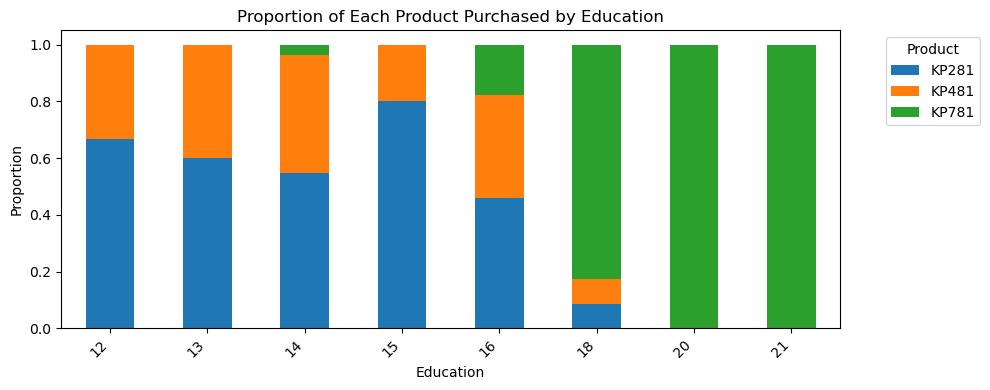

In [85]:
show_group_profile(df, 'Education')

### 🎯 Education-wise Insights

📘 **Lower Education Levels (12–15)**:
- Strong preference for **KP281** (60–80%), with almost no interest in KP781.
- KP481 is a secondary choice, peaking at 40% for level 13.

🎓 **Mid Education Level (16)**:
- KP281 still leads (45.9%) but **KP781 usage increases to 17.7%**, suggesting shifting preferences with higher education.

🎓 **Higher Education Levels (18+)**:
- **KP781 dominates**: 82.6% at level 18, and 100% at levels 20 and 21.
- KP281 and KP481 see **minimal to no usage** at these levels.

📌 **Actionable Insight**:
- **KP781 is the clear choice** among highly educated individuals (18+), indicating a possible correlation with product complexity, brand appeal, or usage intent.
- **KP281 is favored** by those with **lower to mid-level education**, suggesting it might be perceived as more accessible or user-friendly.


Product                KP281 | Count  KP481 | Count  KP781 | Count  KP281 | %  \
Education Income_bins                                                           
12        <40K                     1              1              0   0.500000   
          40–60K                   1              0              0   1.000000   
13        <40K                     2              0              0   1.000000   
          40–60K                   1              2              0   0.333333   
14        <40K                    10              7              0   0.588235   
          40–60K                  20             16              1   0.540541   
          80–100K                  0              0              1   0.000000   
15        <40K                     4              0              0   1.000000   
          60–80K                   0              1              0   0.000000   
16        <40K                     6              1              0   0.857143   
          40–60K                  29             25              6   0.483333   
          60–80K                   4              5              3   0.333333   
          80–100K                  0              0              6   0.000000   
18        40–60K                   0              1              4   0.000000   
          60–80K                   2              1              5   0.250000   
          80–100K                  0              0              7   0.000000   
          100K+                    0              0              3   0.000000   
20        60–80K                   0              0              1   0.000000   
21        60–80K                   0              0              1   0.000000   
          80–100K                  0              0              2   0.000000   

Product                KP481 | %  KP781 | %  
Education Income_bins                        
12        <40K          0.500000   0.000000  
          40–60K        0.000000   0.000000  
13        <40K          0.000000   0.000000  
          40–60K        0.666667   0.000000  
14        <40K          0.411765   0.000000  
          40–60K        0.432432   0.027027  
          80–100K       0.000000   1.000000  
15        <40K          0.000000   0.000000  
          60–80K        1.000000   0.000000  
16        <40K          0.142857   0.000000  
          40–60K        0.416667   0.100000  
          60–80K        0.416667   0.250000  
          80–100K       0.000000   1.000000  
18        40–60K        0.200000   0.800000  
          60–80K        0.125000   0.625000  
          80–100K       0.000000   1.000000  
          100K+         0.000000   1.000000  
20        60–80K        0.000000   1.000000  
21        60–80K        0.000000   1.000000  
          80–100K       0.000000   1.000000

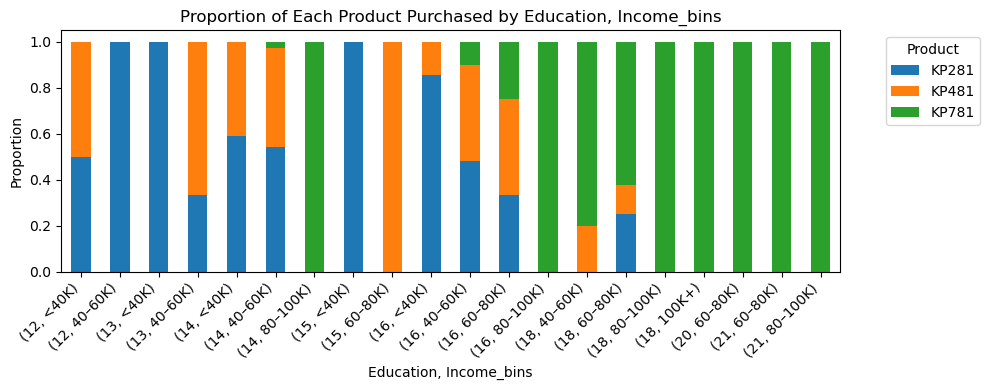

In [87]:
show_group_profile(df, 'Education', 'Income_bins')

### 📌 Key Observations

🔹 **Low Education (12–14)**:
- **KP281 is the primary choice**, especially under <40K and 40–60K.
- Very limited to **no usage of KP781** across all income levels.

🔹 **Mid Education (15–16)**:
- KP281 remains dominant under lower income, but as income rises, **KP781 usage increases**, especially noticeable at education level 16 with 25% at 60–80K and 100% at 80–100K.

🔹 **High Education (18–21)**:
- A **sharp shift to KP781**:
  - At **education 18**, KP781 climbs to **80–100%** in all income bins.
  - At **education 20 and 21**, KP781 holds **100% preference**.

🎯 **General Trend**:
- As **education and income increase**, the **preference shifts significantly from KP281 → KP781**.
- KP781 seems to be **positioned as a premium product**, preferred by more educated and higher-income segments.

💼 **Strategic Insight**:
- Consider **targeted marketing** of KP781 to highly educated, high-income customers.
- KP281 may be optimized for price-sensitive, lower-education segments.

Product,KP281 | Count,KP481 | Count,KP781 | Count,KP281 | %,KP481 | %,KP781 | %
Mile_bins,,,,,,
Short (<100 miles),62,44,8,0.54386,0.385965,0.070175
Medium (100–200 miles),18,15,27,0.30000,0.250000,0.450000
Long (200+ miles),0,1,5,0.00000,0.166667,0.833333


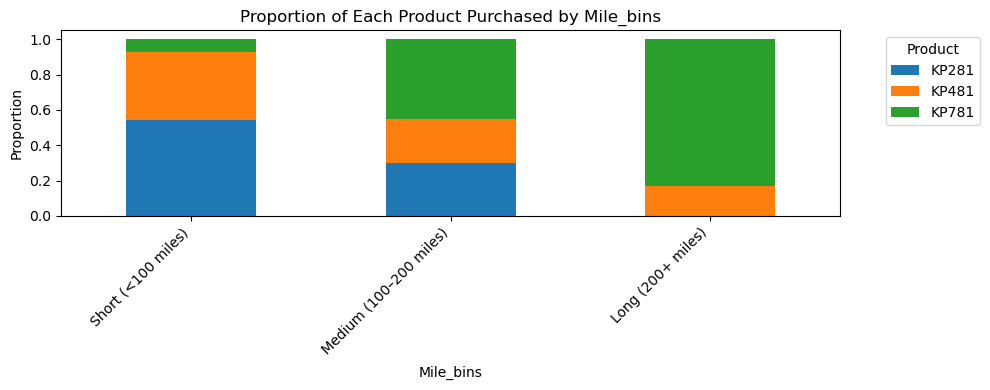

In [89]:
show_group_profile(df, 'Mile_bins')

### 📌 Key Observations

🚘 **Short Distances (<100 miles)**:
- KP281 dominates with **54%**, followed by KP481.
- Very limited adoption of KP781 (only 7%).

🛣️ **Medium Distances (100–200 miles)**:
- Preference starts to shift — **KP781 becomes most popular** (45%).
- KP281 and KP481 see reduced shares (30% and 25%, respectively).

🏔️ **Long Distances (200+ miles)**:
- **KP781 clearly dominates** with **83%** preference.
- **KP281 drops to 0%**, indicating it's not chosen at all for long-distance travel.

🎯 **Overall Insight**:
- **As travel distance increases**, consumers **prefer KP781 significantly more**, suggesting it may be associated with better comfort, durability, or performance.
- KP281 is likely favored for short, possibly routine commutes or local travel.
- KP781 could be positioned as a **premium product for long-distance needs**.

Product                          KP281 | Count  KP481 | Count  KP781 | Count  \
Fitness Mile_bins                                                              
1       Short (<100 miles)                   1              1              0   
2       Short (<100 miles)                  14             12              0   
3       Short (<100 miles)                  46             29              3   
         Medium (100–200 miles)              8             10              1   
4       Short (<100 miles)                   1              2              2   
         Medium (100–200 miles)              8              5              5   
        Long (200+ miles)                    0              1              0   
5       Short (<100 miles)                   0              0              3   
         Medium (100–200 miles)              2              0             21   
        Long (200+ miles)                    0              0              5   

Product                          KP281 | %  KP481 | %  KP781 | %  
Fitness Mile_bins                                                 
1       Short (<100 miles)        0.500000   0.500000   0.000000  
2       Short (<100 miles)        0.538462   0.461538   0.000000  
3       Short (<100 miles)        0.589744   0.371795   0.038462  
         Medium (100–200 miles)   0.421053   0.526316   0.052632  
4       Short (<100 miles)        0.200000   0.400000   0.400000  
         Medium (100–200 miles)   0.444444   0.277778   0.277778  
        Long (200+ miles)         0.000000   1.000000   0.000000  
5       Short (<100 miles)        0.000000   0.000000   1.000000  
         Medium (100–200 miles)   0.086957   0.000000   0.913043  
        Long (200+ miles)         0.000000   0.000000   1.000000

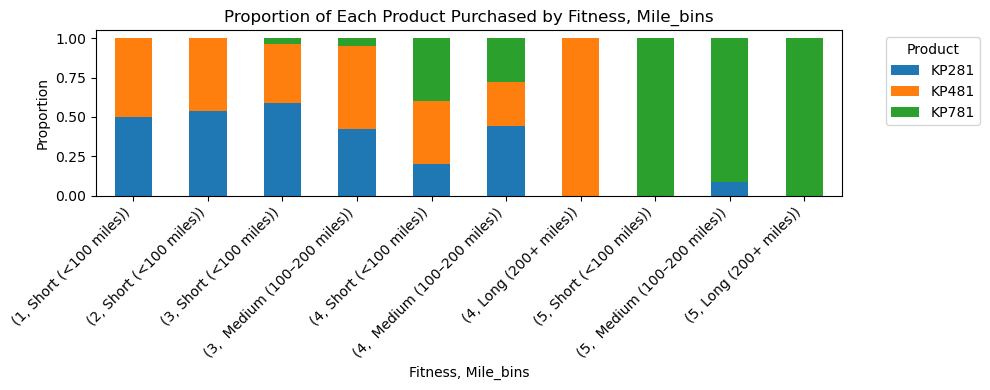

In [91]:
show_group_profile(df, 'Fitness', 'Mile_bins')

### 📌 Key Observations

- **Fitness Levels 1 to 3 (Short Distance Travelers):**  
  KP281 and KP481 are the dominant product choices, with KP281 generally preferred over KP481.

- **Fitness Level 3 (Medium Distance):**  
  KP481 gains more popularity compared to KP281 and KP781, showing a shift in preference as travel distance increases.

- **Fitness Level 4 (All Distances):**  
  For short and medium distances, KP281 still has strong presence, but KP481 and KP781 share the market as well. For long distances, KP481 completely dominates.

- **Fitness Level 5 (High Fitness):**  
  KP781 clearly dominates across all distance bins, especially medium and long distances, indicating this product appeals most to highly fit individuals and long-distance travelers.

- **General Trend:**  
  As fitness level and travel distance increase, preference shifts from KP281 and KP481 to KP781, suggesting KP781 might be designed for users with higher fitness and endurance needs.

Product                                     KP281 | Count  KP481 | Count  \
Gender Income_bins Mile_bins                                               
Female <40K        Short (<100 miles)                  11              0   
                    Medium (100–200 miles)              2              1   
                   Long (200+ miles)                    0              1   
       40–60K      Short (<100 miles)                  19             18   
                    Medium (100–200 miles)              4              5   
       60–80K      Short (<100 miles)                   4              4   
                    Medium (100–200 miles)              0              0   
       80–100K      Medium (100–200 miles)              0              0   
                   Long (200+ miles)                    0              0   
Male   <40K        Short (<100 miles)                   7              7   
                    Medium (100–200 miles)              3              0   
       40–60K      Short (<100 miles)                  19             13   
                    Medium (100–200 miles)              9              8   
       60–80K      Short (<100 miles)                   2              2   
                    Medium (100–200 miles)              0              1   
                   Long (200+ miles)                    0              0   
       80–100K     Short (<100 miles)                   0              0   
                    Medium (100–200 miles)              0              0   
                   Long (200+ miles)                    0              0   
       100K+        Medium (100–200 miles)              0              0   

Product                                     KP781 | Count  KP281 | %  \
Gender Income_bins Mile_bins                                           
Female <40K        Short (<100 miles)                   0   1.000000   
                    Medium (100–200 miles)              0   0.666667   
                   Long (200+ miles)                    0   0.000000   
       40–60K      Short (<100 miles)                   1   0.500000   
                    Medium (100–200 miles)              1   0.400000   
       60–80K      Short (<100 miles)                   1   0.444444   
                    Medium (100–200 miles)              1   0.000000   
       80–100K      Medium (100–200 miles)              2   0.000000   
                   Long (200+ miles)                    1   0.000000   
Male   <40K        Short (<100 miles)                   0   0.500000   
                    Medium (100–200 miles)              0   1.000000   
       40–60K      Short (<100 miles)                   2   0.558824   
                    Medium (100–200 miles)              7   0.375000   
       60–80K      Short (<100 miles)                   2   0.333333   
                    Medium (100–200 miles)              5   0.000000   
                   Long (200+ miles)                    1   0.000000   
       80–100K     Short (<100 miles)                   2   0.000000   
                    Medium (100–200 miles)              8   0.000000   
                   Long (200+ miles)                    3   0.000000   
       100K+        Medium (100–200 miles)              3   0.000000   

Product                                     KP481 | %  KP781 | %  
Gender Income_bins Mile_bins                                      
Female <40K        Short (<100 miles)        0.000000   0.000000  
                    Medium (100–200 miles)   0.333333   0.000000  
                   Long (200+ miles)         1.000000   0.000000  
       40–60K      Short (<100 miles)        0.473684   0.026316  
                    Medium (100–200 miles)   0.500000   0.100000  
       60–80K      Short (<100 miles)        0.444444   0.111111  
                    Medium (100–200 miles)   0.000000   1.000000  
       80–100K      Medium (100–200 miles)   0.000000   1.000000  
                   Long (200+ miles)         0.000000   1.000000  
Male 

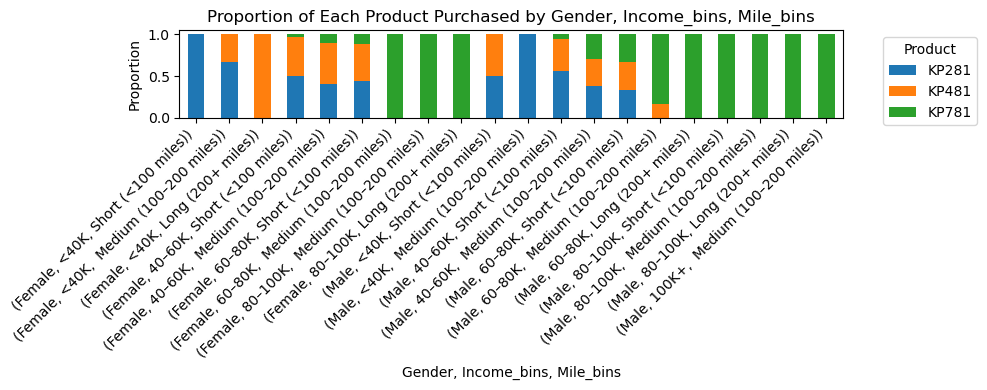

In [93]:
show_group_profile(df, 'Gender', 'Income_bins', 'Mile_bins')

### 📌 Key Observations

👩‍🦰👨‍🦰 **Gender & Income Influence**  
- **Lower-income females (<40K)** show strong preference for **KP281 at short distances (<100 miles)**, sometimes with 100% preference.  
- As income increases, female preference shifts towards **KP481 and KP781**, especially for medium and long distances.

💵 **Income Segmentation**  
- Both **females and males with income 40–60K** split preferences between KP281 and KP481 at short distances, but **KP781 gains share** at medium distances.  
- For **higher incomes (60K+)**, KP781 becomes dominant at medium and long distances, often reaching 100% preference.

🚗 **Travel Distance Impact**  
- At **short distances (<100 miles)**, KP281 and KP481 compete closely, with KP781 rarely chosen.  
- At **medium distances (100–200 miles)**, KP781 gains significant traction and sometimes dominates.  
- At **long distances (200+ miles)**, KP781 **dominates overwhelmingly** regardless of gender or income.

📊 **Overall Insight**  
- **KP281 is preferred mainly by lower-income and short-distance travelers.**  
- **KP481 appeals as a middle-ground product mostly for middle-income and short-to-medium distance travelers.**  
- **KP781 is positioned as a premium product for long-distance travel and higher-income customers.**  
- Marketers should **tailor campaigns combining income, gender, and travel distance data** for better product targeting.

Product                             KP281 | Count  KP481 | Count  \
Education Age_bins           Usage                                 
12        Young(<25)         2                  0              1   
                             3                  1              0   
           Older(35+)        4                  1              0   
13        Young(<25)         3                  2              0   
                             4                  1              0   
           Core group(25–35) 4                  0              2   
14        Young(<25)         2                  4              4   
                             3                  8             11   
                             4                  2              2   
                             5                  0              2   
           Core group(25–35) 2                  5              0   
                             3                  6              3   
                             4                  3              1   
                             7                  0              0   
           Older(35+)        2                  2              0   
15        Young(<25)         2                  3              0   
                             5                  1              0   
           Core group(25–35) 3                  0              1   
16        Young(<25)         2                  1              3   
                             3                  4              4   
                             4                  6              1   
                             5                  1              0   
           Core group(25–35) 2                  4              2   
                             3                  6              7   
                             4                  6              5   
                             5                  0              1   
                             6                  0              0   
           Older(35+)        2                  0              3   
                             3                  8              4   
                             4                  3              1   
                             5                  0              0   
18        Young(<25)         4                  0              0   
                             5                  0              0   
                             6                  0              0   
           Core group(25–35) 2                  0              1   
                             3                  2              1   
                             4                  0              0   
                             5                  0              0   
                             6                  0              0   
                             7                  0              0   
           Older(35+)        4                  0              0   
                             5                  0              0   
20        Young(<25)         4                  0              0   
21         Core group(25–35) 4                  0              0   
           Older(35+)        6                  0              0   

Product                             KP781 | Count  KP281 | %  KP481 | %  \
Education Age_bins           Usage                                        
12        Young(<25)         2                  0   0.000000   1.000000   
                             3                  0   1.000000   0.000000   
           Older(35+)        4                  0   1.000000   0.000000   
13        Young(<25)         3                  0   1.000000   0.000000   
                             4                  0   1.000000   0.000000   
           Core group(25–35) 4                  0   0.000000   1.000000   
14        Young(<25)         2                  0   0.500000   0.500000   
                             3                  0   0.421053   0.578947   
                             4                  1   0

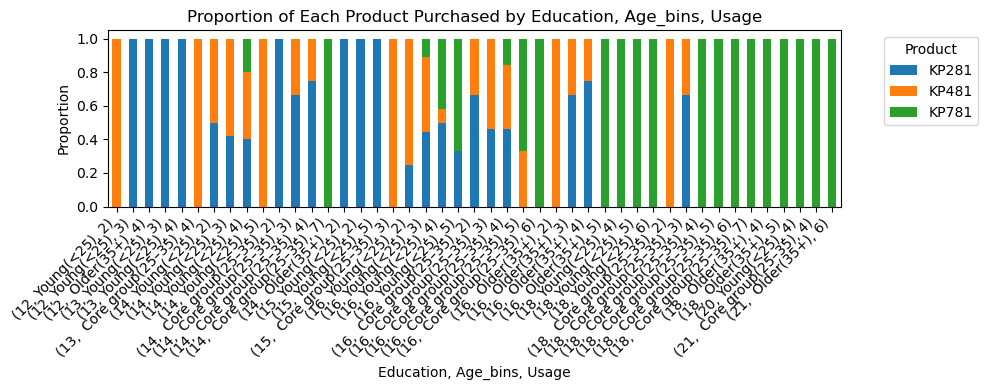

In [95]:
show_group_profile(df, 'Education', 'Age_bins', 'Usage')

### 📌 Key Observations

🎓 **Education & Age Influence**  
- Younger users (<25) show mixed preferences, with **KP481 and KP781** often favored, especially in Education levels 14 and 16.  
- The **core age group (25–35)** mostly prefers **KP281 and KP481**, with some cases where KP781 gains traction, indicating a transitional preference.  
- Older users (35+) exhibit a stronger inclination towards **KP281 and KP481**, but **KP781 also appears** for certain education-age segments.

🔢 **Product Usage Trends by Education Level**  
- Education level 12 shows a clear preference for KP281 among older users, while younger users prefer KP781.  
- Education level 14 reveals a nearly even split between KP281 and KP481, with low KP781 usage, indicating a balance between traditional and new preferences.  
- Education levels 16 and 18 indicate rising KP781 preference, particularly among younger and core groups, suggesting KP781’s appeal to tech-savvy or higher-educated users.

🕰️ **Usage Patterns**  
- KP281 is favored mainly by older users across most education levels, suggesting comfort with established products.  
- KP481 enjoys steady usage among core and younger users, likely representing a mid-tier option.  
- KP781, while less common overall, shows strong preference spikes in younger age groups and higher education levels, pointing to a niche premium or innovative product appeal.

📊 **Overall Insight**  
- **KP281 remains the default choice for older and more traditional users**, often with lower education levels.  
- **KP481 acts as a versatile middle-ground product**, bridging age and education groups.  
- **KP781 is emerging as a premium or innovation-focused product**, favored by younger and higher-educated users.  
- Marketing strategies should **target KP781 to younger, educated demographics** while reinforcing KP281’s reliability with older users.

Product                            KP281 | Count  KP481 | Count  \
MaritalStatus Fitness Income_bins                                 
Partnered     1       <40K                     1              0   
              2       <40K                     3              2   
                      40–60K                   7              5   
                      60–80K                   1              0   
              3       <40K                     7              3   
                      40–60K                  20             18   
                      60–80K                   4              4   
              4       <40K                     0              1   
                      40–60K                   4              3   
                      60–80K                   0              0   
                      80–100K                  0              0   
                      100K+                    0              0   
              5       40–60K                   1              0   
                      60–80K                   0              0   
                      80–100K                  0              0   
                      100K+                    0              0   
Single        1       60–80K                   0              1   
              2       40–60K                   3              5   
              3       <40K                    10              3   
                      40–60K                  12              9   
                      60–80K                   1              2   
                      80–100K                  0              0   
              4       <40K                     2              0   
                      40–60K                   3              4   
                      80–100K                  0              0   
              5       40–60K                   1              0   
                      60–80K                   0              0   
                      80–100K                  0              0   

Product                            KP781 | Count  KP281 | %  KP481 | %  \
MaritalStatus Fitness Income_bins                                        
Partnered     1       <40K                     0   1.000000   0.000000   
              2       <40K                     0   0.600000   0.400000   
                      40–60K                   0   0.583333   0.416667   
                      60–80K                   0   1.000000   0.000000   
              3       <40K                     0   0.700000   0.300000   
                      40–60K                   0   0.526316   0.473684   
                      60–80K                   1   0.444444   0.444444   
              4       <40K                     0   0.000000   1.000000   
                      40–60K                   0   0.571429   0.428571   
                      60–80K                   3   0.000000   0.000000   
                      80–100K                  1   0.000000   0.000000   
                      100K+                    1   0.000000   0.000000   
              5       40–60K                   2   0.333333   0.000000   
                      60–80K                   4   0.000000   0.000000   
                      80–100K                  9   0.000000   0.000000   
                      100K+                    2   0.000000   0.000000   
Single        1       60–80K                   0   0.000000   1.000000   
              2       40–60K                   0   0.375000   0.625000   
              3       <40K                     0   0.769231   0.230769   
                      40–60K                   1   0.545455   0.409091   
                      60–80K                   1   0.250000   0.500000   
                      80–100K                  1   0.000000   0.000000   
              4       <40K                     0   1.000000   0.000000   
                      40–60K                   1   0.375000   0.500000   
                      80–100K                  1   0.000000   0.0

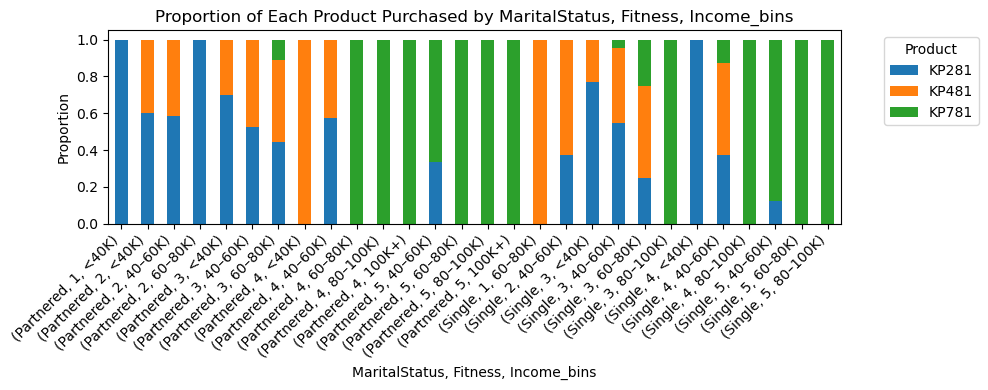

In [97]:
show_group_profile(df, 'MaritalStatus', 'Fitness', 'Income_bins')

### 📌 Key Observations

💍 **Marital Status & Fitness Impact**  
- **Partnered individuals** mostly favor **KP281 and KP481**, with KP281 dominating in lower income bins (<40K to 60–80K).  
- KP781 usage among partnered is minimal but appears more in higher income bins (60K+), especially in fitness groups 4 and 5.  
- **Single individuals** show a stronger preference for **KP481** in the lower to mid-income range (40–60K), while KP281 dominates mostly at lower income (<40K).  

💰 **Income & Product Usage**  
- For **income <40K**, KP281 is dominant regardless of marital status and fitness level.  
- As income rises to **60K+**, KP781 adoption increases sharply, especially for fitness groups 4 and 5 — indicating KP781 is favored by higher earners with higher fitness levels.  
- **KP481 has a steady share** (about 30-60%) in middle-income brackets across marital and fitness segments, positioning it as a mid-tier product.  

🏋️ **Fitness Level Trends**  
- Fitness levels 1 to 3 show a strong preference for KP281 and KP481, with almost no KP781 usage.  
- Fitness levels 4 and 5 display significant KP781 adoption, especially in the higher income bins, suggesting KP781 targets fitness-conscious consumers with more spending power.  

🎯 **Overall Insight**  
- **KP281 dominates among partnered and lower-income consumers with lower fitness levels**, likely due to affordability or familiarity.  
- **KP481 acts as a reliable mid-tier choice**, popular among singles and middle-income groups.  
- **KP781 is the premium product, highly favored by singles and partnered individuals with higher income and fitness levels.**  
- Marketing and product positioning should highlight KP781’s premium and fitness-related benefits to capture the affluent, fitness-focused segment.

### Chi-Square Test for Categorical Variables:

In [100]:
from scipy.stats import chi2_contingency
def chi_square_test(df, col1, col2):
    """
    Perform Chi-Square test for two categorical variables.

    Parameters:
    df (DataFrame): The dataset
    col1 (str): The first categorical column (e.g., 'MaritalStatus')
    col2 (str): The second categorical column (e.g., 'Product')

    Returns:
    tuple: Chi-square statistic, p-value, degrees of freedom, and expected values
    """
    # Cross-tabulate the two columns
    crosstab = pd.crosstab(df[col1], df[col2])
    
    # Perform the Chi-Square test
    chi2, p, dof, expected = chi2_contingency(crosstab)
    
    # Print the result
    print(f"Chi-Square Test Result for {col1} vs {col2}:")
    print(f"Chi2: {chi2}, p-value: {p}")


In [101]:
# List of column pairs to test
column_pairs = [
    ('Gender', 'Product'),
    ('Education', 'Product'),
    ('MaritalStatus', 'Product'),
    ('Usage', 'Product'),
    ('Fitness', 'Product'),
    ('Age_bins', 'Product'),
    ('Income_bins', 'Product'),
    ('Mile_bins', 'Product'),
]

# Loop through each pair and perform Chi-Square test
for col1, col2 in column_pairs:
    chi_square_test(df, col1, col2)
    print('-'*50)

Chi-Square Test Result for Gender vs Product:
Chi2: 12.923836032388664, p-value: 0.0015617972833158714
--------------------------------------------------
Chi-Square Test Result for Education vs Product:
Chi2: 79.8846547314578, p-value: 2.9724307024156666e-11
--------------------------------------------------
Chi-Square Test Result for MaritalStatus vs Product:
Chi2: 0.0806554858532839, p-value: 0.9604745988058153
--------------------------------------------------
Chi-Square Test Result for Usage vs Product:
Chi2: 86.94470427270939, p-value: 2.1562663469001895e-14
--------------------------------------------------
Chi-Square Test Result for Fitness vs Product:
Chi2: 118.77682123122969, p-value: 5.929411535984054e-22
--------------------------------------------------
Chi-Square Test Result for Age_bins vs Product:
Chi2: 0.5990301964378613, p-value: 0.9631713931187564
--------------------------------------------------
Chi-Square Test Result for Income_bins vs Product:
Chi2: 94.90647431296

### Insight based on the Chi-Square test :
- Significant factors affecting product choice: Gender, Education, Usage, Fitness, Income, and Mile_bins.
- No significant factors: Marital status, and Age_bins (borderline significance for Age_bins).

# 🧾 Final Insights & Customer Profiling by Product

## ✅ Product-Wise Summary

### 🟥 KP281 – Mass-Market Favorite
- **Sales Share:** 44%
- **Customer Profile:**
  - **Income:** <40K – 60K
  - **Fitness Level:** Moderate (Level 3)
  - **Age Group:** 18–25
  - **Gender:** Popular among both genders (higher among females)
  - **Travel Distance:** <150 miles
- **Positioning:** Budget-friendly, entry-level product
- **Recommendation:**
  - Focus on **high-volume sales**
  - Market to **young adults**, **college students**, and **entry-level users**
  - Offer **combo deals** with gyms, wellness apps, or EMI plans

---

### 🟦 KP481 – Mid-Tier Option
- **Sales Share:** 33%
- **Customer Profile:**
  - **Income:** 40K – 60K
  - **Fitness Level:** Moderate (Level 3)
  - **Gender:** Balanced (slightly more male)
  - **Travel Distance:** Short to Medium
- **Positioning:** Mid-range product for moderately fit individuals
- **Recommendation:**
  - Highlight **value-for-money**, **reliability**, and **features**
  - Target **young professionals**, **couples**, and **small families**
  - Bundle with **family health plans** or **corporate fitness packages**

---

### 🟩 KP781 – Premium Performance Product
- **Sales Share:** 22%
- **Customer Profile:**
  - **Income:** >70K (especially 80K+)
  - **Fitness Level:** High (Levels 4–5)
  - **Gender:** Strongly male-skewed
  - **Travel Distance:** 200+ miles
- **Positioning:** High-end treadmill for serious fitness enthusiasts
- **Recommendation:**
  - Market as a **luxury or performance-focused product**
  - Use **elite athlete endorsements**, **tech features**, and **advanced metrics**
  - Explore strategies to **appeal to affluent females** (design, messaging)

---

## 🎯 Customer Profiling & Targeting

| Segment              | Income     | Fitness | Preferred Product | Gender Focus   | Strategy                             |
|---------------------|------------|---------|-------------------|----------------|--------------------------------------|
| Budget Buyers        | <40K       | 1–3     | KP281             | Female-heavy   | Local deals, discounts, easy finance |
| Young Professionals  | 40K–60K    | 2–3     | KP281/KP481       | Balanced        | Social media & email campaigns       |
| Fitness Aspirants    | 60K–80K    | 3–4     | KP481/KP781       | Male-dominant  | Mid-tier upsell offers               |
| Premium Buyers       | 80K+       | 4–5     | KP781             | Neutral        | Premium branding & performance focus |
| Educated Women       | 80K+       | 4–5     | KP781             | Female-focused | Design enhancement, testimonials     |

---

## 🧠 Strategic Recommendations

- 🎯 **Segment-Based Campaigns**: Tailor ads by income, fitness level, and gender.
- 💡 **Close the Gender Gap for KP781**: Make it more inclusive for female users.
- 🔄 **Bundled Offerings**: Combine treadmills with gym subscriptions or virtual coaching.
- 🔍 **Data Retargeting**: Use behavioral data (miles run, fitness score) to retarget ads.
- 🤝 **Brand Partnerships**: Collaborate with fitness brands and influencers.


In [200]:
!git status

fatal: not a git repository (or any of the parent directories): .git
